# <font size='8px'><font color='#FFFF00'>**Project Name**    - <font color='#ADD8E6'>Smart Demand Forecasting for Yulu Bike-Sharing Services



#####<font size='5px'>  **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -** Gaurav Jangir


# **Project Summary -**

In an era where urban mobility is rapidly transforming, Yulu Bike stands out as a pioneer in offering eco-friendly, shared micro-mobility solutions. The success of such services relies heavily on accurately forecasting demand to ensure timely availability of bikes and efficient resource allocation. This project aims to develop a predictive model using historical and contextual data (including weather, time-based variables, and event markers) to anticipate user demand for bike rentals.

By leveraging data analytics and machine learning techniques, the project will deliver actionable insights to:

- Optimize fleet deployment and bike distribution,

- Enhance user satisfaction by reducing bike shortages or surpluses,

- Improve operational planning and resource utilization,

- Account for environmental and seasonal factors to maintain service consistency year-round.

# **GitHub Link -**

https://github.com/Gaurav-jangir-45/bike-rental-demand-prediction-ml-xgboost

# **Problem Statement**


Yulu Bike faces challenges in meeting fluctuating customer demand due to varying external factors such as weather, time of day, and special events. Ineffective demand forecasting can lead to either a shortage of bikes during peak times or excessive idle bikes during low demand periods, resulting in lost revenue and reduced customer satisfaction.

The objective of this project is to build a data-driven predictive model to accurately forecast bike-sharing demand using available contextual features. This model will help Yulu Bike optimize fleet operations, enhance customer experience, and ensure consistent service delivery regardless of external influences.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Data Handling & Exploration libraries
import pandas as pd
import numpy as np

# Import Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Date Time library for Date column
from datetime import datetime as dt

# Import imputing library for missing value imputing
from sklearn.impute import SimpleImputer

# Import Data Preprocessing & Feature Engineering libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import ML modles
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Import Evaluation libraries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset

# Creating a file path so i can easily access my Csv file.
filepath = '/content/SeoulBikeData.csv'

# Creating DataFrame of Csv file
bike_df = pd.read_csv(filepath, encoding='latin1')

### Dataset First View

In [ ]:
# Dataset First Look

# First 5 Rows of Dataset
print("First 5 Rows of the Dataset are: \n")
bike_df.head()

In [ ]:
# Last five rows of dataset
print("Last 5 Rows of the Dataset are: \n")
bike_df.tail()

In [ ]:
# Overall look of Dataset
bike_df

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
shape = bike_df.shape # Creating shape variable
print(f"The number of Rows in Dataset are: {shape[0]}")
print(f"The number of Columns in Dataset are: {shape[1]}")

### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = bike_df.duplicated().sum()
print(f"The number of duplicate values in the dataset are: {duplicate_count}")

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bike_df.isnull().sum().rename("Total missing values")

In [ ]:
# Visualizing the missing values

print("As there are no missing values in any column of our dataset, visualizing missing data is unnecessary.")

### What did you know about your dataset?

The dataset used for this project contains 8,760 rows and 14 columns, representing hourly bike rental data collected over the span of one year. Each record corresponds to a specific hour in a day and includes various weather-related and calendar-based features that potentially influence bike rental behavior.

**✅ Data Quality:**

- **Missing Values:**
There are no missing values in the dataset. All 14 columns are complete and contain 8,760 non-null entries, which means no data imputation is required.


- **Duplicate Records:**
The dataset contains 0 duplicate rows, indicating that each hourly observation is unique and reliable.

- **Data Type Adjustments:**
The Date column is currently stored as an object and needs to be converted to a proper datetime format for time-based analysis and feature extraction (such as day, month, or weekday).

- **Categorical Columns:**

  - Seasons, Holiday, and Functioning Day are categorical features and will need to be encoded before being used in machine learning models.

  - Encoding methods like Label Encoding or One-Hot Encoding will be applied based on the model requirements.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
columns = list(bike_df.columns) # Creating a list of all existing columns in the DataFrame.
columns

In [ ]:
# Dataset Describe
bike_df.describe().T.style.background_gradient(cmap="Reds")

### Variables Description

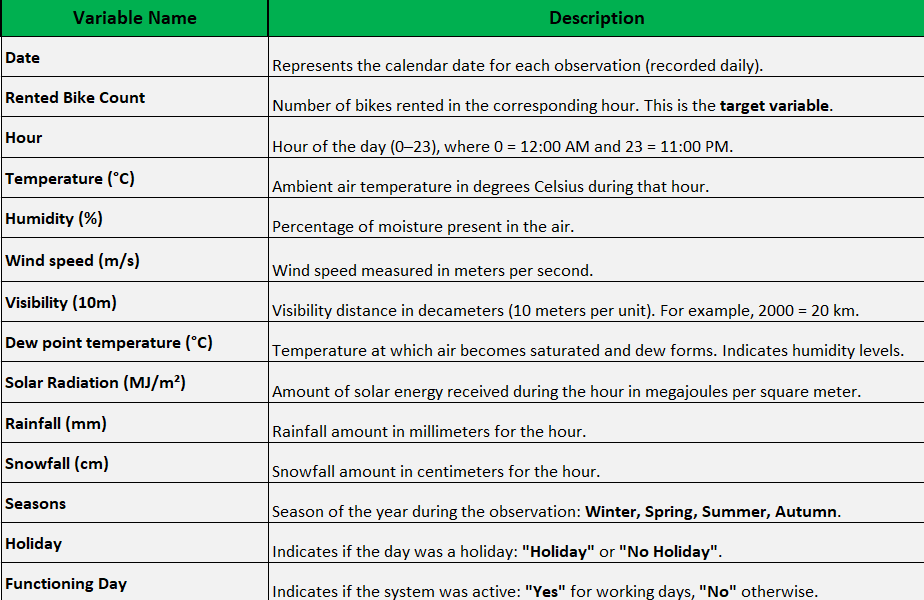

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
bike_df.nunique().rename("Total Unique Values")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Make a copy of original Dataset
df_copy = bike_df.copy() # Making a copy of the dataset is important to ensure that our original dataset remains intact and safe from any modifications.

In [ ]:
# Add rain_condition flag feature
def rainfall_flag(x):
  if x == 0:
    return "no_rain"
  else:
    return "rain"

# Apply to the DataFrame
df_copy['rain_condition'] = df_copy['Rainfall(mm)'].apply(rainfall_flag)

In [ ]:
# Add sun_condition flag feature
def solar_radiation_flag(x):
  if x > 0.5:
    return "sunny"
  else:
    return "cloudy"

# Apply to the DataFrame
df_copy['sun_condition'] = df_copy['Solar Radiation (MJ/m2)'].apply(solar_radiation_flag)

In [ ]:
# Add snow_condition flag feature
def snowfall_flag(x):
  if x == 0:
    return "no_snow"
  else:
    return "snow"

# Apply to the DataFrame
df_copy['snow_condition'] = df_copy['Snowfall (cm)'].apply(snowfall_flag)

In [ ]:
# Add temperature category column
def categorize_temperature(temp):
    if temp < 10:
        return 'cold'
    elif 10 <= temp <= 25:
        return 'moderate'
    else:
        return 'hot'

# Apply to the DataFrame
df_copy['temperature_category'] = df_copy['Temperature(°C)'].apply(categorize_temperature)

In [ ]:
# Write your code to make your dataset analysis ready.

# Fix Data Types (Convert columns to appropriate Type)
def correct_data_type(df, max_categories=10):
    """
    Converts datetime and categorical columns automatically.

    Args:
        df (pd.DataFrame): Input DataFrame.
        max_categories (int): Max unique values to treat as categorical (default: 10).

    Returns:
        pd.DataFrame: Processed DataFrame with optimized dtypes.
    """

    # Convert "Date" to datetime
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

    # Auto-detect categorical columns (low cardinality strings)
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].nunique() <= max_categories:
            df[col] = df[col].astype('category')

    return df

# Apply the above function on "df_copy" DataFrame
df_copy = correct_data_type(df_copy)

# Check our datatypes correctly changed or not
print(df_copy.dtypes)

In [ ]:
# Create Time Based Features

# From "Date" extrect useful time_related variables to capture trends and seasonality
def extract_time_features(df, date_col='Date'):
  """
    Extracts day, month, weekday, and weekend features from an existing datetime column.

    Args:
        df (pd.DataFrame): Input DataFrame with a datetime column.
        date_col (str): Name of the datetime column (default: 'Date').

    Returns:
        pd.DataFrame: DataFrame with new datetime features.

    Raises:
        ValueError: If `date_col` is not datetime.
    """

  # Check if the column exists and is datetime
  if date_col not in df.columns:
    raise ValueError(f"Column '{date_col}' not found in the DataFrame.")
  if not pd.api.types.is_datetime64_any_dtype(df[date_col]):
    raise ValueError(f"Column '{date_col}' must be datetime type.")

  # Extract Features
  df['Day'] = df[date_col].dt.day
  df['Month'] = df[date_col].dt.month
  df['Weekday'] = df[date_col].dt.weekday #  # 0=Monday, 6=Sunday
  df['Weekend'] = df['Weekday'].apply(lambda x: 1 if x in [5, 6] else 0)

  return df

# Apply the above function on "bike_df" DataFrame
df_copy = extract_time_features(df_copy)
df_copy.head()

In [ ]:
# Rename columns (To simplify column names)

import re # for string operations

def clean_column_names(df, replace_space='_',
                      remove_chars='()%!@#',
                       replace_slash='_per_',
                       replace_degreeC="_C",
                       lowercase=False,
                       strip_whitespace=True):
   """
    Standardizes DataFrame column names by:
    - Replacing spaces, special chars, slashes and °C
    - Optional lowercase conversion
    - Trimming whitespace

    Args:
        df (pd.DataFrame): Input DataFrame.
        replace_space (str): Character to replace spaces with (default: '_').
        remove_chars (str): Characters to remove (default: '()%!@#').
        replace_slash (str): Replacement for '/' (default: '_per_').
        replace_degreeC (str): Replacement for '°C' (default: '_C').
        lowercase (bool): Convert to lowercase if True (default: False).
        strip_whitespace (bool): Remove leading/trailing whitespace if True (default: True).

    Returns:
        pd.DataFrame: DataFrame with cleaned column names.
    """
   def _clean_name(name):
      # 1. Replace Whitespaces
      name = re.sub(r'\s+', replace_space, name)

      # 2. Remove Special Characters
      for char in remove_chars:
          name = name.replace(char, '')

      # 3. Handle Slashes
      if replace_slash:
          name = name.replace('/', replace_slash)

      # 4. Handle °C
      name = name.replace("°C", replace_degreeC)

      # 5. Convert to Lower
      if lowercase:
          name = name.lower()

      # 6. Trim Whitespace
      if strip_whitespace:
          name = name.strip()

      return name
   # Apply the cleaning function to each column name
   df.columns = [_clean_name(col) for col in df.columns]
   return df

# Apply above function on our "bike_df" DataFrame
df_copy = clean_column_names(df_copy)

# Check column transformed columns names
df_copy.columns

In [ ]:
# Checking all imputations
df_copy.info()

In [ ]:
# Dataset Describe (Statistical summary of cleand dataset)
df_copy.drop('Date', axis=1).describe().T.style.background_gradient(cmap="Reds")

In [ ]:
# Filter rows where Functioning_Day is "No" and sum the rentals
non_functioning_days_total = df_copy[df_copy['Functioning_Day'] == 'No']['Rented_Bike_Count'].sum()

print(f"Total bikes rented on non-functioning days: {non_functioning_days_total}")

### What all manipulations have you done and insights you found?

**🔧 Data Wrangling Summary:**

- Created weather-based condition flags (rain_condition, snow_condition, sun_condition) to simplify weather metrics.

- Categorized temperature into cold, moderate, and hot ranges.

- Converted relevant string columns to categorical and Date to datetime.

- Extracted time-based features like day, month, weekday, and weekend.

- Cleaned and standardized all column names for analysis and visualization.

**🔎 Key Observations:**

- Most of the entries fall under **no_rain** and **no_snow** categories, indicating that bike rentals predominantly happen during clear weather.

- The majority of rental records correspond to cold temperature conditions, suggesting that bike usage continues even in colder weather, though extreme temperatures may reduce demand.

- The addition of sun_condition shows that rentals increase on sunny days, implying that solar radiation (i.e., sunlight) plays a positive role in user behavior.

- No Function days has 0 bike rented because on these days company has holiday.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Univariate Analysis -**

#### Chart - 1 --> Countplot


In [ ]:
# Chart - 1 visualization code

# Countplot for seasons
plt.figure(figsize=(8,7)) # fix the size of countplot
ax = sns.countplot(data=df_copy, x='Seasons', palette='viridis', order=['Spring', 'Summer', 'Autumn', 'Winter'], saturation=0.9) # Creating a countplot in descending order

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=11) # Add data lables on top center of each bar

# Style enhancements
plt.title('Bike Rental Distribution by Seasons', fontsize=14, pad=20, weight='bold') # Add title of count plot
plt.xlabel('Seasons', fontsize=12, labelpad=10) # Add x_lables as season names
plt.ylabel('Number of Rentals', fontsize=12, labelpad=10) # Add y_lables as count of bike rentals according to each season
plt.xticks(fontsize=11) # Adjust x_tick as starting point 0

# Adjust layout
plt.tight_layout() # Avoid overlapping
plt.show()

##### 1. Why did you pick the specific chart?

**Reason for Choosing Count Plot Chart:**

- A countplot is ideal when visualizing the frequency distribution of categorical variables, like Seasons.

- It provides a clear and direct comparison of how often bike rentals occur in each season.

- The inclusion of exact value labels on bars enhances readability and immediate understanding of the differences.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**

- Spring and Summer have the highest number of rentals, each with 2,208 rentals.

- Autumn sees a slight drop to 2,184 rentals.

- Winter records the lowest number of rentals at 2,160, which might be due to colder weather conditions impacting user demand.

- Overall, there is a mild seasonal variation in rental demand, with warmer seasons attracting slightly more usage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can lead to positive business impact:

**1. Inventory & Fleet Planning:** During Spring and Summer, demand is marginally higher, so more bikes can be made available or relocated to high-traffic zones.

**2. Marketing Strategy:** Promotions or seasonal offers can be tailored to boost Winter usage, potentially offsetting the seasonal dip.

**3. Maintenance Scheduling:** Lower rental activity in Winter provides a strategic window for bike servicing or upgrades.

**4. Revenue Forecasting:** Understanding seasonal trends helps in creating more accurate financial projections and resource allocation.

-----------------------------------------------------------------------------
While the drop in Winter demand is not extreme, ignoring it could lead to cumulative negative business impact over time. Proactive strategies can turn this insight into an opportunity for growth and differentiation.

#### Chart - 2 --> Countplot

In [ ]:
# Chart - 2 visualization code

# Checking counts of Holidays
print(df_copy['Holiday'].value_counts())

# Count plot for Holiday vs No Holiday
plt.figure(figsize=(6,4)) # Set size of countplot
sns.countplot(data=df_copy, x='Holiday', palette='pastel', saturation=0.9) # Creating countplot

# Style enhancements
plt.title('Bike Rental Distribution Of Holiday', fontsize=14, pad=20, weight='bold') # Title in bold text
plt.xlabel('Holiday', fontsize=12, labelpad=10) # X_label in fontsize 12
plt.ylabel('Number of Rentals', fontsize=12, labelpad=10) # y_label in fontsize 12
plt.show()

##### 1. Why did you pick the specific chart?

**Reason for Choosing This Chart:**

- A countplot is the best tool to visualize the distribution of categorical variables, such as the Holiday status (Holiday vs No Holiday).

- It provides a clear and intuitive comparison of how many rentals occurred on holidays versus non-holidays.

- The visual gap between bars helps stakeholders quickly grasp user behavior in relation to holiday schedules.



##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**

- There is a huge imbalance between the two categories:

  - No Holiday: 8,328 rentals (approx. 95%)

  - Holiday: 432 rentals (approx. 5%)

- Most users prefer (or need) to rent bikes on working days or non-holidays, suggesting bike usage is commute-driven (e.g., work, school, etc.).

- Holiday usage is minimal, indicating that leisure or recreational usage may be low.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help creating a positive business impact. Here's how:

**a. User Behavior Understanding:**

- Knowing that bike rentals are significantly higher on non-holidays allows the company to optimize operations (fleet allocation, maintenance) on regular weekdays.

**b. Targeted Marketing:**
- Holidays have low usage → a chance to introduce holiday-special discounts or family/group rental offers to encourage usage.

**c. Strategic Resource Allocation:**
- More bikes can be made available or rebalanced based on weekday vs. holiday demand trends.

**d. Product Development Insight:**
- Introduce features like tourist packages or guided routes to boost usage during holidays.

-------------------------------------------------------------------------
Yes. Here’s a potential negative growth insight:

❗ Low Usage on Holidays May Indicate Missed Revenue Opportunities.


**Justification:**

**1. Idle Fleet on Holidays:**

- With only 432 rentals on holidays, the bikes may be underutilized during high footfall tourist or leisure times, resulting in lost potential revenue.

**2. Uncaptured Leisure Market:**

- If the product is perceived as only for commuting, the business misses tapping into the leisure and tourism segment.

**3. Revenue Imbalance:**

- Heavy dependency on weekday commuters means that any disruption (e.g., remote work trends, public transport improvement) could hurt weekday rentals significantly.

#### Chart - 3 --> Count Plot

In [ ]:
# Chart - 3 visualization code

# Bike Rental distribution for Functioning_Day
print(df_copy['Functioning_Day'].value_counts())

# Creating count Plot for Functioning_Day
plt.figure(figsize=(6,4)) # Set the Chart size
sns.countplot(data=df_copy, x='Functioning_Day', palette='Set1', saturation=0.9)

# Style enhancements
plt.title('Bike Rental Distribution Of Functioning_Day', fontsize=14, pad=20, weight='bold') # Setting title for chart in bold letters with fontsize=14
plt.xlabel('Functioning_Day', fontsize=12, labelpad=10) # Set the x_label with fontsize=12
plt.ylabel('Number of Rentals', fontsize=12, labelpad=10) # Set the y_label with fontsize=12
plt.show()

##### 1. Why did you pick the specific chart?

**Reason for Choosing This Chart:**

- A countplot is the most appropriate choice for showing the distribution of categorical variables such as Functioning_Day (Yes vs No).

- It provides a straightforward visual comparison between days when the bike rental system was operational versus non-operational.

- Easy to interpret for both technical and non-technical stakeholders.

##### 2. What is/are the insight(s) found from the chart?

**Insights:**

- Yes (Functioning Days): 8,465 rentals → ~97% of total data

- No (Non-Functioning Days): 295 rentals → ~3% of total data

- The bike rental system was almost always operational.

- Very few days were labeled as "Non-Functioning," possibly due to public holidays, extreme weather, strikes, or system downtime.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help creating a positive business impact. Here's how:

**a. Operational Efficiency Validation:**
- High number of functioning days confirms that the bike-sharing system is highly reliable and consistent.

**b. Performance Metrics:**
- Stakeholders can use this as evidence of operational stability—a key metric for attracting investors or city partnerships.

**c. Planning and Budgeting:**
- Since only ~3% of the time is non-functioning, resources (like maintenance and workforce) can be better scheduled during these rare downtimes.

**d. Predictive Modeling:**
- This insight helps modelers confidently exclude “No” functioning days from demand prediction models, improving accuracy.
-----------------------------------------------------------------------------

Yes, though minimal, non-functioning days can still lead to potential negative impacts:

❗ Even a small number of non-functioning days can hurt customer experience and revenue.

**Justification:**

**1. Customer Trust & Retention:**

- Unexpected service unavailability can lead to loss of user trust and lower app ratings.

**2. Revenue Loss:**

- Even one day of downtime (especially during peak demand or holidays) may result in significant revenue loss, especially for daily/hourly rental models.

**3. User Shift to Competitors:**

- Users may shift to other transport options if service reliability is perceived as low, even temporarily.




#### Chart - 4 --> Pie chart

In [ ]:
# Chart - 4 visualization code

# Bike Rental Distribution with rain_condition
Rental_distribution_percentage = df_copy['rain_condition'].value_counts(normalize=True) * 100
print(Rental_distribution_percentage)

# Pie chart for rental distribution for rain conditions
plt.figure(figsize=(6,4)) # Set size of pie chart
plt.pie(Rental_distribution_percentage, labels=Rental_distribution_percentage.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Bike Rental Distribution by Rain Conditions', fontsize=14, pad=20, weight='bold') # title of pie chart
plt.show()

##### 1. Why did you pick the specific chart?

**Reason for Choosing This Chart:**

- A pie chart is ideal for showing proportional distribution of a categorical variable.

- Since rain_condition has only two categories (rain and no_rain), a pie chart clearly highlights their percentage share.

- It’s a visually intuitive way to communicate how dominant or minor one condition is over the other.



##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**

- 94% of bike rentals occurred during “no rain” conditions.

- Only 6% of rentals happened during rain.

- This clearly shows that rain significantly reduces bike rental activity.

- The high percentage of no-rain rentals suggests that users avoid riding bikes in wet conditions, likely due to safety and comfort concerns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insight is very useful. Here’s how:

**a. User Behavior Understanding:**
- Strong indication that weather is a major factor in rental demand.

- This helps in forecasting demand more accurately using weather data.

**b. Strategic Planning:**
- Operators can reduce bike supply or staff deployment during predicted rain days to avoid inefficiencies.

**c. Marketing & Product Improvement:**
- There’s an opportunity to design weather-proof rental options (e.g., bikes with mudguards, ponchos, or covers).

- Can offer rain-day discounts or flexible return policies to encourage usage.
------------------------------------------------------------------------------

Yes. The data leads to a negative impact:

❗ Bike rentals drastically drop during rain conditions, showing a demand vulnerability.

**Justification:**

**1. Demand Volatility:**

- Dependence on good weather conditions makes the revenue stream unpredictable.

**2. Missed Revenue Opportunities:**

- If users completely avoid the service during rain, the business loses potential income, especially in cities with frequent rainfall.

**3. Fleet Underutilization:**

- Bikes remain idle during rainy days, but maintenance, staffing, and operational costs still continue, reducing profit margins.

**4. Customer Inconvenience:**

- Lack of rain-appropriate infrastructure (e.g., covered parking, non-slip tires) may deter loyal users during bad weather.

#### Chart - 5 --> Pie chart

In [ ]:
# Chart - 5 visualization code

# Bike Rental Distribution with rain_condition
Rental_distribution_percentage = df_copy['sun_condition'].value_counts(normalize=True) * 100
print(Rental_distribution_percentage)
print('**'*50)
print(df_copy['sun_condition'].value_counts())

# Pie chart for rental distribution for sun conditions
plt.figure(figsize=(6,4)) # Set the size of pie chart
plt.pie(Rental_distribution_percentage, labels=Rental_distribution_percentage.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Bike Rental Distribution by Sun Conditions', fontsize=14, pad=20, weight='bold') # Title of pie chart in Bold text
plt.show()

##### 1. Why did you pick the specific chart?

**Why this chart is appropriate:**

- A pie chart is a great choice for visualizing proportional data in a categorical variable with two categories (sunny and cloudy).

- It clearly communicates the share of each sun condition in total bike rentals.

- For stakeholder reports or dashboards, pie charts are easy to interpret at a glance.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights from the Data:**

- 67.03% of rentals occurred on cloudy days (5,872 rides).

- 32.97% of rentals occurred on sunny days (2,888 rides).

- This result might seem surprising — more rides occur on cloudy days than sunny ones.

**Possible interpretations:**

- Cloudy conditions may be more frequent than sunny days in your dataset's time range — hence more total rides.

- Cloudy weather does not deter users significantly, showing steady demand even in sub-optimal sunlight.

- Alternatively, users may ride for commuting, where weather has less impact unless it’s extreme (e.g., rain, storm).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Here's how the gained insights help create a positive business impact:

**a. Weather-Independent Usage Behavior:**
- Users seem comfortable riding even when it’s cloudy → indicates reliability in demand, which is good for business planning.

**b. Better Inventory Planning:**
- Fleet deployment or servicing doesn't need to be adjusted drastically for sunny/cloudy conditions — only for extreme conditions like rain.

**c. Marketing Messaging:**
- This insight helps create campaigns that normalize cloudy-day rides, e.g., “Don’t let the clouds slow you down!”

**d. User Engagement:**
- Promote regular use by showing historical data like "Most of our riders enjoy cloudy rides too!"
------------------------------------------------------------------------------

While this chart shows a generally balanced pattern, here’s one potential negative insight:

❗ Lower rentals on sunny days could signal missed engagement opportunities.
Justification:

**1. Sunny days = Leisure potential:**

- Sunny weather usually encourages leisure activities, but with only ~33% rides, it suggests low uptake from casual/recreational users.

#### Chart - 6 --> Pie chart

In [ ]:
# Chart - 6 visualization code

# Bike Rental Distribution for snow_condition
Rental_distribution_percentage = df_copy['snow_condition'].value_counts(normalize=True) * 100
print(Rental_distribution_percentage)
print('**'*50)
print(df_copy['snow_condition'].value_counts())

# Pie chart for bike rental distribution for snow_condition
plt.figure(figsize=(6,4)) # Set the size of pie chart
plt.pie(Rental_distribution_percentage, labels=Rental_distribution_percentage.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Bike Rental Distribution by Snow Conditions', fontsize=14, pad=20, weight='bold') # Title of pie chart wiht bold text
plt.show()

##### 1. Why did you pick the specific chart?

**Reason for Choosing This Chart:**

- Since snow_condition is a binary categorical variable (snow vs. no_snow), a pie chart is well-suited to:

  - Visualize the proportion of bike rentals under each snow condition.

  - Quickly convey the dominant condition in terms of rental activity.

- It’s simple, effective, and visually intuitive — making it a good choice for reports or business presentations.



##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**

- 94.94% of all rentals occurred on no-snow days (8,317 rentals).

- Only 5.06% of rentals occurred on snowy days (443 rentals).

- This confirms a sharp decline in usage during snow conditions.

- Like rain, snow is a major deterrent for bike users — likely due to safety, comfort, and reduced bike availability or accessibility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Here's how the gained insights help create a positive business impact:

**a. Operational Planning:**
- Helps the operations team anticipate low demand during snowy weather, avoiding overstocking bikes or overstaffing.

**b. Improved Forecasting Models:**
- Shows the need to include weather conditions like snowfall as a strong feature in any demand prediction model.

**c. User Communication Strategy:**
- On forecasted snowy days, companies can notify users in advance, offer alternate travel suggestions, or provide safety guidance.

**d. Risk Mitigation:**
- Helps in managing fleet wear and tear, as snowy conditions might damage bikes. Rentals should be limited or halted in such cases.

----------------------------------------------------------------------------
Yes. Snowy conditions clearly result in reduced bike usage, which can lead to negative growth in colder seasons.

**Justification:**

**1. Demand Drop:**

- Only 5% of total rentals happen during snowy days — indicating that a large customer segment avoids biking altogether in snow.

**2. Revenue Loss in Winters:**

- In locations with long winters, this could cause significant seasonal revenue decline.

3. **Unused Resources:**

- If bikes and infrastructure remain underutilized, it leads to inefficient capital deployment and higher maintenance costs without revenue.

**4. User Attrition Risk:**

- Long periods of service inactivity may cause users to shift to alternative transport modes, leading to loss of regular customers.

#### Chart - 7 --> Countplot

In [ ]:
# Chart - 7 visualization code

# Calculate temprature impact on bike rents
print(df_copy['temperature_category'].value_counts())

# Countplot to check the impact of temprature on bike rents
plt.figure(figsize=(6,6)) # Set the size fo countplot
ax = sns.countplot(data=df_copy, x='temperature_category',
                  palette='Set3',
                  order=['cold', 'moderate', 'hot'],  # Ensures logical ordering
                  saturation=0.9)

# Add data labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2.,  # x-position
            y=height + 0.05*df_copy['temperature_category'].value_counts().max(),  # y-position (slightly above bar)
            s=f'{height:,}',  # formatted label
            ha='center', va='bottom',  # alignment
            fontsize=11,
            color='black')

# Style enhancements
plt.title('Bike Rental Distribution by Temperature Category',
          fontsize=14, pad=20, weight='bold')
plt.xlabel('Temperature Category', fontsize=12, labelpad=10)
plt.ylabel('Number of Rentals', fontsize=12, labelpad=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Remove top and right spines for cleaner look
sns.despine()

# Add light grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Reason for Choosing This Chart:**

- The variable temperature_category is categorical with three levels: cold, moderate, and hot.

- A bar chart (Countplot) is ideal for comparing counts of rentals across discrete categories.

- It offers a clear visual comparison of how temperature influences the number of bike rentals.

- Logical ordering (cold, moderate, hot) makes the trend easy to understand.



##### 2. What is/are the insight(s) found from the chart?

**Key Observations:**

- Moderate temperatures saw the highest number of rentals: 3,683

- Cold weather follows closely: 3,575

- Hot weather had the lowest rentals: 1,502

**Interpretation:**

- Moderate weather is ideal for biking, likely due to comfortable riding conditions.

- Cold weather doesn’t deter users much, suggesting that people still bike — possibly for commuting — even when it’s chilly.

- High temperatures significantly reduce rentals, probably due to discomfort, fatigue, or safety concerns (e.g., heat exhaustion).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights are valuable in multiple areas:

**a. Seasonal Business Strategy:**
- Companies can increase marketing or offers during moderate-temperature periods to maximize profits.

**b. Fleet Management:**
- Predict lower usage during hot days and reduce bike deployment accordingly to optimize maintenance and costs.

**c. User Experience Improvements:**
- On hot days, promote cooling accessories (e.g., water bottle holders, shaded parking) or offer discounts to motivate usage.

**d. Forecast Modeling:**
- Reinforces the need to include temperature as a key feature in demand prediction models.

---------------------------------------------------------------------
Yes – High temperatures lead to a sharp decline in rentals.

**Justification:**

**1. Reduced Demand in Hot Conditions:**

- Rentals drop by nearly 60% when temperature is high compared to moderate days.

Indicates a vulnerability in hot-weather seasons (e.g., summer months in tropical cities).

User Comfort & Health Risk:

Hot weather discourages biking due to sweating, fatigue, and possible heatstroke, which can reduce overall ridership.

Revenue Impact:

This behavior results in lost earning opportunities during hot seasons unless mitigated by targeted promotions or cooling features.



#### Chart - 8 --> Donut chart

In [ ]:
# Chart - 8 visualization code

# Bike Rental Distribution for Weekends
rental_distribution = df_copy['Weekend'].value_counts(normalize=True) * 100
print(rental_distribution)
print('**'*50)
print(df_copy['Weekend'].value_counts())

# Donut chart for weekend bike rentals
plt.figure(figsize=(6, 4)) # set the size fo donut chart
wedges, texts, autotexts = plt.pie(
    rental_distribution,
    labels=rental_distribution.index.map({0: 'Weekday', 1: 'Weekend'}),  # More descriptive labels
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops={'width': 0.4, 'edgecolor': 'white'},  # This creates the donut hole
    textprops={'fontsize': 12}
)

# Add a circle at the center to complete the donut
centre_circle = plt.Circle((0,0), 0.2, color='white')
plt.gca().add_artist(centre_circle)

# Customize title and layout
plt.title('Bike Rental Distribution: Weekday vs Weekend',
          fontsize=16, pad=20, weight='bold')
plt.tight_layout()

# Equal aspect ratio ensures the pie is drawn as a circle
plt.axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

**Reason for Choosing This Chart:**
- A pie/donut chart is ideal to visually represent percentage-based proportions between two exclusive categories.

- Donut chart enhances readability and gives a more aesthetic and modern look, especially when center space is unused.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights:**

- A significantly larger proportion of rentals happen on weekdays, indicating:

  - Bikes are primarily used for commuting or daily routine activities.

  - Weekend leisure rides or casual usage is relatively lower.

- Nearly 3/4 of all rentals are concentrated during the workweek.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — these insights can directly support business decisions related to operations, marketing, and customer experience.

| Area                    | How it Helps                                                                                                                          |
| ----------------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| **Fleet Management**    | Helps allocate **more bikes on weekdays** and **redistribute or maintain** bikes during weekends.                                     |
| **Targeted Promotions** | Launch **weekend-specific campaigns** to boost off-peak usage: e.g., "Weekend Family Ride", "2-for-1 offers", or student discounts.   |
| **Pricing Strategy**    | Can use **dynamic pricing** – weekday prices can be slightly higher due to high demand, while weekend discounts encourage more rides. |
| **Resource Planning**   | Staff schedules, customer support, and maintenance can be optimized based on **rental activity pattern**.                             |


---------------------------------------------------------------------

Yes, the low weekend rental rate (28.5%) could be a red flag:

| Risk Area                        | Negative Insight                                                                                            | Justification                                                                   |
| -------------------------------- | ----------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------- |
| **Underutilization on Weekends** | A large chunk of bikes may be **idle** on weekends, leading to **missed revenue**.                          | Indicates untapped customer segments like tourists, casual riders, or students. |
| **Limited Market Penetration**   | Suggests that bike rentals are seen only as **functional/commuting** tools, not for recreation or wellness. | Reduces lifetime value of users who could use bikes for both purposes.          |


#### Chart - 9 --> Histogram + KDE plot

In [ ]:
# Chart - 9 visualization code

# Histogram + KDE plot for all numerical columns
# Set style
sns.set_style('whitegrid')

# Create a figure with subplots
numerical_cols = ['Rented_Bike_Count', 'Temperature_C', 'Humidity', 'Wind_speed_m_per_s',
                  'Visibility_10m', 'Dew_point_temperature_C', 'Solar_Radiation_MJ_per_m2', 'Rainfallmm', 'Snowfall_cm'] # List of Numeric columns
plt.figure(figsize=(18, 10)) # Fig size
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i) # 3 Rows, 3 columns, ith postition
    sns.histplot(data=df_copy, x=col, kde=True, bins=20) # Creating Histogram
    plt.title(f'Distribution of {col}') # Title for each plot
plt.tight_layout() # Avoid overlapping
plt.show()

##### 1. Why did you pick the specific chart?

**Reason for Choosing This Chart:**
- These plots are ideal for continuous numerical variables.

- They clearly show the distribution shape (normal, skewed, uniform, etc.).

- Overlaying KDE (Kernel Density Estimation) gives a smoothed probability curve, helping identify modes, skewness, and spread.

- Used for understanding central tendencies, outliers, and data transformation needs for modeling.

##### 2. What is/are the insight(s) found from the chart?

summarize key insights from each subplot:

| Feature                           | Distribution Insight                                                                                         |
| --------------------------------- | ------------------------------------------------------------------------------------------------------------ |
| **Rented\_Bike\_Count**           | **Right-skewed** → Most users rent < 500 bikes/day. Long tail up to 3500 suggests rare high-demand days.     |
| **Temperature\_C**                | **Bimodal to slightly normal** → Peaks around 10–25°C → Comfortable climate range for riders.                |
| **Humidity**                      | **Moderate spread**, slight **right skew**. Most values between 40–80%.                                      |
| **Wind\_speed\_m\_per\_s**        | **Right-skewed**, with most days having **low wind speeds** (<2.5 m/s). High winds are rare.                 |
| **Visibility\_10m**               | **Right-skewed**, peak at 2000 meters → Majority days had full visibility. Low-visibility days are very few. |
| **Dew\_point\_temperature\_C**    | **Evenly spread** with slight right skew.                                                                    |
| **Solar\_Radiation\_MJ\_per\_m2** | **Heavily right-skewed** → Most days have **low solar radiation**, few with high levels.                     |
| **Rainfall\_mm**                  | **Highly right-skewed** → Almost all days had **no or minimal rainfall**. Outliers show heavy rain events.   |
| **Snowfall\_cm**                  | **Highly right-skewed** → Vast majority of days have **0 snowfall**. Snowfall is rare.                       |


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help create a positive business impact. Here's How:

**1. Feature Engineering:**

- Log/Box-Cox transformation may be needed for skewed variables before modeling.

- Helps in deciding which variables might need binning (e.g., rainfall, snowfall).

**2. Model Accuracy:**

- Knowing skewed features allows you to better preprocess data for regression or classification models → improves prediction accuracy.

**3. Operational Planning:**

- Since most days are clear, dry, and calm, fleet planning can prioritize normal conditions.

- For rare weather events (rain, snow), special policies or surge-pricing can be planned.

**4.Marketing & Incentives:**

- Days with high solar radiation or extreme temperatures can see reduced activity → targeted campaigns can mitigate this.

-----------------------------------------------------------------------------

Yes – Multiple environmental variables show conditions that are potential demand suppressors

| Feature                        | Risk for Negative Growth | Reason                                                                                       |
| ------------------------------ | ------------------------ | -------------------------------------------------------------------------------------------- |
| **Rainfall & Snowfall**        | Yes                      | Even though rare, days with heavy rain/snow can significantly reduce rentals → lost revenue. |
| **Solar Radiation (hot days)** | Yes                      | High radiation days are fewer but possibly linked to **user discomfort** and reduced demand. |
| **Wind Speed**                 | Moderate                 | Higher wind speeds (though rare) can also deter casual riders.                               |
| **Extreme Humidity**           | Slight                   | May affect comfort, especially when combined with heat or poor air quality.                  |


#### Chart - 10 --> HIstogram + KDE Plot

In [ ]:
# Chart - 10 visualization code

# Histogram + Kde Plot for time releated numerical features
# Set style
sns.set_style('whitegrid')

# Create a figure with subplots
numerical_cols = ['Hour', 'Day', 'Month', 'Weekday'] # List of Numeric columns
plt.figure(figsize=(10, 8)) # Fig size
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i) # 3 Rows, 3 columns, ith postition
    sns.histplot(data=df_copy, x=col, kde=True, bins=20) # Creating Histogram
    plt.title(f'Distribution of {col}') # Title for each plot
plt.tight_layout() # Avoid overlapping
plt.show()

##### 1. Why did you pick the specific chart?

**Reason for Choosing This Chart:**

- These are discrete-time variables (e.g., 0–23 for hours, 1–12 for months).

- Histogram gives a count-based frequency view.

- KDE overlay helps spot distribution shape or repetition patterns, even in discrete variables.

- Helps detect seasonal cycles, daily patterns, or anomalies over time.

##### 2. What is/are the insight(s) found from the chart?

summarize key insights from each subplot:

| Feature     | Key Insights                                                                                                                                                                              |
| ----------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Hour**    | **Four high peaks** likely correspond to popular rental hours — possibly around early morning, midday, evening, and night. This suggests **riders use bikes in shifts** or for commuting. |
| **Day**     | Fairly **uniform distribution across days of the month**, suggesting no rental bias toward specific dates. Slight dip at the end (maybe fewer data points on 31st).                       |
| **Month**   | Rentals are fairly **even across months**, with **slightly increasing trend in the later months (Oct–Dec)**. Indicates consistent usage year-round with **mild seasonal growth**.         |
| **Weekday** | Clear **cyclical pattern** — regular dips and rises every 7 days → implies that some weekdays (like weekends or Mondays) may have consistently **lower rental demand**.                   |


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. These time-based insights are crucial for demand forecasting, operations planning, and marketing.

✅ Positive Business Impacts:

**1. Peak Hour Targeting:**

- Identify key rental hours for fleet deployment, maintenance planning, and promotional campaigns (e.g., offer incentives during off-peak times).

**2. Consistent Monthly Demand:**

- No significant drop in any month means the service is not highly seasonal → good for stable revenue planning.

**3. Weekly Pattern Detection:**

- Fluctuations across weekdays help plan targeted weekend offers, staffing schedules, or weekday discounts to balance usage.

**4. Data Readiness:**

- Even distribution across days/months confirms good data quality (no major missing chunks from time).

------------------------------------------------------------------------------

Yes, Are there any insights that lead to negative growth:

| Area                     | Potential Negative Growth | Reason                                                                                                                                                           |
| ------------------------ | ------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Weekday Fluctuations** | Yes                       | If weekends (or certain weekdays) consistently underperform and are not addressed, it leads to **missed revenue**.                                               |
| **Extreme Hour Gaps**    | Yes                       | Very low rental counts in some hours may point to **underutilized infrastructure**, **excessive downtime**, or missed delivery opportunities during those hours. |
| **End-of-Month Drop**    | Slight                    | Possibly fewer records or less usage on 30th/31st could indicate **incomplete data logging** or operational limitations (e.g., billing cycles, maintenance).     |


# **Bivariate Analysis -**

#### Chart - 11 --> Scatter Plot

In [ ]:
# Chart - 11 visualization code

# Rentals vs Temperature (Scatter Plot) for measure temp effect on bike rentals
plt.figure(figsize=(8, 6)) # fix the size of the plot
sns.scatterplot(data=df_copy, x='Temperature_C', y='Rented_Bike_Count',
                alpha=0.6, color='royalblue') # Creating scatter plot
plt.title('Bike Rentals vs Temperature', fontsize=14) # Title of scatter plot with text size=14
plt.xlabel('Temperature (°C)')
plt.ylabel('Bikes Rented')
plt.grid(True) # Activate grid line
plt.show()

##### 1. Why did you pick the specific chart?

**Reason for Selection:**

- For analyzing the relationship between two continuous numerical variables:

  - X-axis: Temperature (°C)

  - Y-axis: Bikes Rented

- Scatter plots are ideal for identifying trends, clusters, correlations, and outliers in numerical relationships.

- This helps in understanding how temperature influences rental demand.

##### 2. What is/are the insight(s) found from the chart?

**✅ Positive Correlation:**
- As temperature increases from -10°C to ~25°C, bike rentals also increase.

- The highest concentration of rentals is observed between 15°C and 25°C, indicating optimal riding conditions.

**🔻 Performance Drop at Extremes:**
- Rentals are significantly lower when temperature is below 0°C (cold weather deterrent).

- Rentals also decline slightly beyond 30°C, possibly due to heat discomfort.

**📈 Peak Demand Zone:**
- The ideal temperature range for maximum rentals appears to be 15–25°C.

- This can be classified as the “comfort band” for users.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help create a positive business impact very strongly:

**✅ Positive Business Impact:**

| Area                       | Opportunity                                                                                             |
| -------------------------- | ------------------------------------------------------------------------------------------------------- |
| **Seasonal Forecasting**   | Enables demand forecasting for high/low seasons based on temperature predictions.                       |
| **Inventory Optimization** | Can scale up fleet availability during favorable weather conditions (15–25°C).                          |
| **Marketing Campaigns**    | Weather-based promotions can be launched — e.g., "Perfect Weather, Perfect Ride!" in spring/fall.       |
| **Customer Engagement**    | Notify users during favorable weather via push notifications: “Great riding weather today — book now!”. |
| **Pricing Strategy**       | Offer **temperature-based dynamic pricing** or discounts when demand is expected to drop.               |


-----------------------------------------------------------------------------



#### Chart - 12 --> Scatter Plot

In [ ]:
# Chart - 12 visualization code

# Rentals vs Humidity (scatter plot) to measure	Moisture impact on bike rentals.
plt.figure(figsize=(8,6)) # fix the size of scatter plot
sns.scatterplot(data=df_copy, x = 'Humidity', y = 'Rented_Bike_Count', alpha = 0.6, color = 'royalblue') # Creating scatter plot
plt.title('Bike Rentals vs Humidity', fontsize = 14) # Title of scatter plot
plt.xlabel('Humidity')
plt.ylabel('Bikes Rented')
plt.grid(True) # Activate grid lines
plt.show()

##### 1. Why did you pick the specific chart?

**Reason for Selecting this chart:**

- We are comparing two continuous numerical variables **X-axis: Humidity (%)** and **Y-axis: Bikes Rented**. Scatter plots are ideal for comparing two continuous numerical variables.

- Scatter plots are ideal for:

  - Observing correlation or trends

  - Detecting non-linear patterns or clusters

- Spotting outliers or data density

This chart is especially useful for understanding how atmospheric humidity levels influence rental behavior.

##### 2. What is/are the insight(s) found from the chart?

**✅ General Observations:**

| Humidity Range | Observation                                                                            |
| -------------- | -------------------------------------------------------------------------------------- |
| **0–20%**      | Very few data points — possibly rare atmospheric condition. Rentals low to moderate.   |
| **20–60%**     | Rentals are **highly scattered**; a **large proportion of high rentals** happens here. |
| **>70%**       | Rentals **gradually decline** — fewer instances of high rental volumes.                |

----------------------------------------------------------------------------

**📉 No Strong Linear Correlation:**
- Unlike temperature, humidity doesn't show a clear linear relationship with bike rentals.

- However, there’s a slight negative correlation at higher humidity levels — rentals tend to decrease when humidity is very high (>80%).

**❗ Bottom Line Observations:**
- There is a significant cluster at zero bike rentals across all humidity levels — likely due to non-weather-related factors (e.g., night hours or system downtime).



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights help creating a positive business impact. Here's How:

**✅ Positive Business Impact:**

| Area                                 | Impact                                                                                                            |
| ------------------------------------ | ----------------------------------------------------------------------------------------------------------------- |
| **Customer Experience Optimization** | Avoid aggressive promotions or campaigns during very humid days — users are less likely to ride.                  |
| **Operational Planning**             | Expect **lower usage during rainy/humid seasons** — reduce operational strain (maintenance, bike redistribution). |
| **Targeted Offers**                  | During moderately humid (30%–60%) days, run **weather-comfort ride offers**.                                      |

--------------------------------------------------------------------------------

Yes — potential risk factors are identified:

| Concern                               | Justification                                                                                                                                                                                            |
| ------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **High Humidity = Lower Rentals**     | When humidity is high (>80%), rentals noticeably drop — likely due to discomfort, sweat, or rain-associated days.                                                                                        |
| **False Assumptions Without Context** | If decisions are made solely based on humidity without considering **rain/wind/temperature**, it may result in **incorrect predictions** or **wasted promotions**.                                       |
| **Flatline Effect**                   | A dense line of **0 rentals across humidity values** hints at time-based or system-based limitations that need further exploration — these null values might distort insights if not filtered correctly. |


#### Chart - 13 --> Scatter Plot

In [ ]:
# Chart - 13 visualization code

# Rentals vs Rainfall (Scatter Plot) to measure Rain influence on bike rentals.
plt.figure(figsize=(6,4)) # Fix the size of Box plot
sns.scatterplot(data=df_copy, x = 'Rainfallmm', y='Rented_Bike_Count', color = 'red') # Creating a red color Box plot
plt.title('Bike Rentals vs Rainfall', fontsize = 14) # Title of chart
plt.xlabel('Rainfall (mm)')
plt.ylabel('Bikes Rented')
plt.show()

##### 1. Why did you pick the specific chart?

**Reason for Selecting this chart:**

- We are comparing two continuous numerical variables **X-axis: Rainfall (mm)**
and Y-axis: Bikes Rented. Scatter Plots are ideal to comparing two continuous numerical variables.

- A scatter plot is ideal to detect:

  - Correlation patterns

  - Outliers

- Effect of rainfall on rental volume

This chart clearly reveals the sensitivity of bike rental demand to precipitation, helping us understand behavioral shifts.



##### 2. What is/are the insight(s) found from the chart?

**Key insights :**

**📊 Clear Negative Relationship:**
- As rainfall increases, the number of bikes rented decreases significantly.

- Most rentals occur when rainfall is zero or minimal.

- Very few rentals are observed when rainfall is above 5 mm.

- Near 0 rentals when rainfall exceeds 10 mm — a strong deterrent effect.

**🚨 High Density at 0 mm:**

- There is a sharp peak in rentals around 0 mm rainfall — showing that dry weather is strongly preferred.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definitely. These insights have strong business implications:

**✅ Positive Business Impact**:

| Application                | Impact                                                                                                          |
| -------------------------- | --------------------------------------------------------------------------------------------------------------- |
| **Demand Forecasting**     | During rainy days, expect **low to negligible demand** — avoid overstocking bikes or overstaffing.              |
| **Operational Efficiency** | Reduce or pause rebalancing, maintenance schedules during high-rainfall hours.                                  |
| **Marketing/Promotion**    | Avoid campaigns or discounts during expected rainy periods — **low ROI**.                                       |
| **Dynamic Pricing Models** | Implement **discounts only in light drizzles** (1–3 mm), if weather is not a major deterrent — test cautiously. |

****************************************************************************

Yes — there are critical insights that could cause negative impact if not acted upon:

**🚫 Potential Risks:**

| Issue                                     | Reason                                                                                                                                       |
| ----------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------- |
| **Ignoring Weather Trends**               | If the business doesn’t consider rainfall forecasts, it may waste resources — unused bikes, idle workforce, or underutilized infrastructure. |
| **Over-reliance on Rainy Season Revenue** | Expecting similar revenue trends across seasons can result in **poor financial planning**.                                                   |
| **Operational Mismanagement**             | Deploying too many bikes on rainy days leads to **wear, rust, and increased maintenance cost** with **zero ROI**.                            |


#### Chart - 14 --> Scatter Plot

In [ ]:
# Chart - 14 visualization code

# Rentals vs Snowfall (Scatter Plot) to measure Snowfall impact on bike rentals.
plt.figure(figsize=(6,4)) # Fix the size of Box plot
sns.scatterplot(data=df_copy, x = 'Snowfall_cm', y='Rented_Bike_Count', color = 'red') # Creating a red color Box plot
plt.title('Bike Rentals vs Snowfall', fontsize = 14) # Title of chart
plt.xlabel('Snowfall (cm)')
plt.ylabel('Bikes Rented')
plt.show()

##### 1. Why did you pick the specific chart?

**Reason for Choosing this chart:**

- We are comparing two continuous numerical variables **X-axis: Snowfall (cm)** and **Y-axis: Bikes Rented**. Scatter plot is ideal for comparing two numerical variables.

- A scatter plot is perfect to identify:

  - The correlation or lack thereof

  - Behavior patterns of bike rentals with respect to snowfall

  - Outlier behavior (e.g., rentals happening despite heavy snow)

It clearly illustrates how snowfall influences user behavior in terms of renting bikes.



##### 2. What is/are the insight(s) found from the chart?

**❄️ Key Observations:**

- Sharp Decline in Rentals with increasing snowfall.

- Majority of bike rentals occur when snowfall = 0 cm.

- Rentals drop significantly after 1 cm and become negligible after 3 cm.

- Very few outliers where rentals occur above 4–6 cm snowfall — likely due to essential travel or misrecorded data.

**📉 Correlation Insight:**

- There’s a strong negative correlation between snowfall and bike rentals.

- This indicates that even light snowfall reduces ridership significantly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definitely. These insights have strong business implications:

**✅ Positive Business Impact:**

| Use Case                   | Benefit                                                                          |
| -------------------------- | -------------------------------------------------------------------------------- |
| **Demand Prediction**      | Helps avoid over-deploying bikes during snowy days                               |
| **Inventory Management**   | Reduce wear-and-tear costs by **limiting deployment in snow**                    |
| **Seasonal Strategy**      | Can **pause services in heavy snow zones** or shift focus to other transit modes |
| **Marketing Optimization** | Avoid promotions or discounts in snowfall-heavy months or regions                |

**💼 Operational Decision Example:**

If the forecast shows snowfall > 2 cm, reduce bikes on road and staff at rental stations — this saves cost and maintains operational efficiency.

-----------------------------------------------------------------------------

Yes — if these patterns are ignored, they could cause negative impact:

| Risk                             | Reason                                                                                            |
| -------------------------------- | ------------------------------------------------------------------------------------------------- |
| **Over-supply in snowy weather** | Low rentals + exposure to snow may **damage equipment**                                           |
| **Resource Wastage**             | Station staff, maintenance crew, and marketing efforts will be **underutilized** or wasted        |
| **Customer Dissatisfaction**     | If bikes are deployed and **roads are not safe**, it could risk **accidents** and brand trust     |
| **Poor Seasonal Planning**       | If business plans are not adjusted for **winter slowdown**, it could lead to **cash flow issues** |


#### Chart - 15 --> Box Plot

In [ ]:
# Chart - 15 visualization code

# Box Plot to compare Weather Conditions (intensities of rain, snow types, and sun condition) on bike rentals
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))  # 1 row, 3 columns

features = ['rain_condition', 'snow_condition', 'sun_condition']  # Features for Box plot
titles = ['Rentals by Rain Condition', 'Rentals by Snow Condition', 'Rentals by Sun Condition'] # Titles for plots

for i, feature in enumerate(features, 1): # Extracting index and index value
    plt.subplot(1, 3, i)  # (rows, cols, index)
    sns.boxplot(x=df_copy[feature], y=df_copy['Rented_Bike_Count'], color='red') # Creting box plot
    plt.title(titles[i - 1])
    plt.xlabel(feature.replace('_', ' ').title())
    if i == 1:
        plt.ylabel('Rented Bike Count')
    else:
        plt.ylabel('')  # Remove y-axis label for middle and last plots

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

We selected box plots to analyze the relationship between categorical weather conditions (e.g., rain, snow, sun) and the rental bike count (numerical).
Box plots are ideal for:

- Comparing distributions across different categories.

- Identifying central tendency (median), spread (IQR), and outliers.

- Capturing the impact of categorical weather features on rentals in a single, interpretable format.

This makes them highly effective for visualizing behavioral patterns under different weather conditions.



##### 2. What is/are the insight(s) found from the chart?

**Key Insights :**

**🌧️ Rain Condition (Left Plot):**

- Median rentals during no-rain days are significantly higher than on rainy days.

- The interquartile range (IQR) and maximum rentals are much wider for no-rain, showing better rental performance.

- Rainy days drastically reduce rentals, and outliers are fewer in number and magnitude.

**❄️ Snow Condition (Middle Plot):**

- A similar trend is observed: rentals are higher on no-snow days.

- Median and IQR shrink under snow, indicating lower and more consistent low demand.

**☀️ Sun Condition (Right Plot):**
- Rentals are higher on sunny days compared to cloudy days.

- However, the difference between sunny and cloudy is less dramatic than rain/snow effects.

- Suggests people still rent bikes on cloudy days, though sunny weather encourages more activity.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes — if these patterns are ignored, they could cause negative impact:

| Use Case                  | Business Benefit                                                                         |
| ------------------------- | ---------------------------------------------------------------------------------------- |
| **Inventory Forecasting** | Reduce the number of deployed bikes on rainy/snowy days to avoid underutilization.       |
| **Cost Optimization**     | Save operational costs (maintenance, redistribution) on bad weather days.                |
| **Marketing Campaigns**   | Target promotions on sunny/no-rain days to maximize ROI.                                 |
| **User Communication**    | Provide weather-aware app notifications to manage expectations and guide user behavior.  |
| **Risk Mitigation**       | Reduce liability by limiting operations during hazardous weather conditions (rain/snow). |

These measures will contribute to higher efficiency, improved user satisfaction, and better allocation of resources.

---------------------------------------------------------------------------

Yes, ignoring these insights can result in negative business outcomes:

| Risk Area                          | Negative Impact                                                                        |
| ---------------------------------- | -------------------------------------------------------------------------------------- |
| **Over-supply during bad weather** | Leads to **wasted resources**, as rentals drop sharply.                                |
| **Higher Maintenance Costs**       | Bikes exposed to rain/snow may suffer **accelerated wear and tear**.                   |
| **Customer Safety**                | Operating in adverse weather increases risk of **accidents and legal issues**.         |
| **Brand Reputation**               | Failing to adapt to weather patterns may signal **poor service reliability** to users. |


Ignoring the clear drop in rentals during rainy and snowy conditions can directly lead to financial inefficiencies and operational risks.


#### Chart - 16 --> Pie chart

In [ ]:
# Chart - 16 visualization code

# Calculate Bike rental for each temperature category
temprature_category = pd.DataFrame(df_copy.groupby(['temperature_category'])['Rented_Bike_Count'].sum()).reset_index()
print(temprature_category)
print('*'*50)
# Extract values and labels
rental_counts = temprature_category['Rented_Bike_Count']
labels = temprature_category['temperature_category']

# Plotting the pie chart
plt.figure(figsize=(7, 4))  # Size of this pie chart
plt.pie(rental_counts, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', n_colors=len(labels)))
plt.title('Bike Rentals by Temperature Category')  # Title of pie chart
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.legend(labels, loc="upper right")  # Add legend
plt.show()



##### 1. Why did you pick the specific chart?

The Pie chart is used to visualize the total bike rentals across temperature categories (cold, moderate, and hot). This chart type is effective because:

- It clearly shows comparative totals between categories.

- The categorical variable (temperature_category) has a limited number of levels, making it well-suited for a Pie chart.

- The use of color (viridis palette) and ordered categories (moderate, hot, cold) improves readability and narrative flow.

This chart was selected to quantify the relationship between temperature and total demand, which helps in identifying optimal weather conditions for rentals.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights :**

- Moderate temperature results in the highest number of bike rentals (≈ 3.2 million), making it the most favorable condition for usage.

- Hot weather comes next (≈ 1.77 million rentals), suggesting demand remains strong but drops slightly, possibly due to discomfort in extreme heat.

- Cold weather leads to the lowest rentals (≈ 1.18 million), indicating users avoid biking in colder conditions.

This suggests that pleasant/moderate climates encourage outdoor activity, and temperature extremes negatively affect ridership.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights are valuable for business strategy and operational planning:

| Strategic Area             | Positive Impact                                                                |
| -------------------------- | ------------------------------------------------------------------------------ |
| **Demand Forecasting**     | Better estimate of expected rentals across seasons.                            |
| **Inventory Management**   | Allocate and redistribute bikes more effectively based on weather predictions. |
| **Marketing & Promotions** | Focus marketing campaigns during moderate months to maximize usage.            |
| **Maintenance Planning**   | Schedule bike servicing and downtime during low-demand periods (cold months).  |
| **Pricing Strategy**       | Consider **dynamic pricing** based on temperature to optimize revenue.         |

By aligning business operations with temperature-driven demand patterns, companies can improve customer experience, reduce idle inventory, and increase profit margins.

-------------------------------------------------------------------------------

Yes, ignoring these insights can result in negative business outcomes:

- Cold weather leads to a significant drop in rentals.

- If this trend is ignored, it could result in over-deployment of bikes in winter months, leading to:

- Higher operational costs (e.g., moving/storing unused bikes).

- Increased wear and damage to equipment in harsh weather.

- Wasted marketing spend during low engagement periods.

Therefore, failing to respond to seasonal temperature patterns can directly lead to inefficiencies and revenue loss.

#### Chart - 17 --> Line Chart

In [ ]:
# Chart - 17 visualization code

# Group data by Hour and calculate average rentals
hourly_rentals = df_copy.groupby('Hour')['Rented_Bike_Count'].mean().reset_index()

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5)) # Set the size of line plot

# Line plot
sns.lineplot(data=hourly_rentals, x='Hour', y='Rented_Bike_Count', marker='o', color='blue')

# Chart formatting
plt.title('Average Bike Rentals by Hour of Day', fontsize=14) # Add title of line plot
plt.xlabel('Hour of the Day (0–23)', fontsize=12)
plt.ylabel('Average Rented Bike Count', fontsize=12)
plt.xticks(range(0, 24))  # Show all hours on x-axis
plt.grid(True) # Activate grid lines

plt.tight_layout() # Adjust layout
plt.show()


##### 1. Why did you pick the specific chart?

The line chart was chosen to display the average bike rentals across different hours of the day (0–23). This chart type is ideal because:

- It effectively captures temporal trends and patterns over a continuous variable (Hour).

- It shows smooth changes over time, making it easy to spot peaks and troughs in user behavior.

- The markers at each hour help clearly identify the value at that point, which enhances readability for reporting and stakeholder presentations.

This visualization helps understand daily usage cycles, which is critical for operational decision-making.

##### 2. What is/are the insight(s) found from the chart?

From the line chart, we observe the following usage pattern:

- Lowest rentals are observed during late night to early morning hours (12 AM – 6 AM), with the minimum at 4 AM (≈132 rentals).

- First peak occurs around 8 AM (≈1015 rentals)—likely due to the morning commute.

- A steady increase begins again from 3 PM, reaching the highest peak at 6 PM (≈1503 rentals), indicating evening commute or leisure activity.

- Rentals start to decline post 8 PM, though remain relatively high until 10 PM.

These insights reveal two strong rental surges—one in the morning (8 AM) and another, more intense, in the evening (6–8 PM).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this hourly trend analysis can drive several strategic and operational improvements:

| Use Case                   | Positive Impact                                                                                           |
| -------------------------- | --------------------------------------------------------------------------------------------------------- |
| **Bike Allocation**        | Ensure **maximum availability during peak hours** (8 AM & 6–8 PM).                                        |
| **Dock Management**        | Prevent **overcrowding or stockouts** at key locations during high demand periods.                        |
| **Maintenance Scheduling** | Perform **repairs during low-demand hours** (e.g., 1–5 AM) to minimize service disruption.                |
| **Pricing Strategy**       | Implement **dynamic pricing** to increase profits during peak hours.                                      |
| **Marketing Campaigns**    | Target **off-peak hours** (midday or late night) with **discounts or incentives** to spread usage evenly. |

Overall, the insights support better resource planning, user experience optimization, and revenue maximization.

--------------------------------------------------------------------------

Yes, ignoring this temporal behavior can negatively impact operations:

- If bikes are under-allocated during peak hours (especially 6–8 PM), users may face unavailability, leading to frustration and churn.

- Conversely, if too many bikes are idle during off-peak hours, it results in increased operational costs (maintenance, storage) and wasted assets.

- Failure to recognize hourly usage may also lead to inefficient staffing, poor customer satisfaction, and missed revenue opportunities.

Therefore, not leveraging these hourly patterns could contribute to service inefficiency and reduced profitability.



#### Chart - 18 -- Line Plot

In [ ]:
# Chart - 18 visualization code

# Group data by Month and calculate average rentals
monthly_rentals = df_copy.groupby('Month')['Rented_Bike_Count'].mean().reset_index()
print(monthly_rentals)
print('*'*50)
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5)) # Size of line plot

# Line plot
sns.lineplot(data=monthly_rentals, x='Month', y='Rented_Bike_Count', marker='o', color='blue')

# Chart formatting
plt.title('Average Bike Rentals by months', fontsize=14) # Add the title of line plot
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Rented Bike Count', fontsize=12)
plt.xticks(range(1, 13))  # Show all months on x-axis
plt.grid(True) # Activate grid lines
plt.tight_layout() # Adjust layout
plt.show()

##### 1. Why did you pick the specific chart?

A line chart was selected to visualize the average bike rentals across all 12 months. This chart is suitable for:

- Displaying seasonal trends over a continuous time period.

- Helping identify peaks and troughs in user demand across the calendar year.

- Communicating patterns clearly and intuitively, especially when the variable (months) has a natural order.

By showing monthly variation, this plot supports decisions related to seasonal operations and planning.

##### 2. What is/are the insight(s) found from the chart?

**From the plot and values, we can derive the following insights:**

- Lowest rental volumes are observed in winter months—January (≈202) and December (≈249), likely due to cold temperatures and snowfall.

- Bike rentals start increasing from March, with a sharp rise between April to June, reaching the highest average in June (≈1246).

- Rentals remain consistently high from May to October, indicating a sustained peak during late spring, summer, and early fall.

- Rentals begin to decline significantly from November, dropping sharply again in December.

This demonstrates a clear seasonal trend, with summer and warmer months showing significantly higher demand than winter.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. These monthly trends offer actionable insights for strategic decisions:

| Use Case                | Business Impact                                                                                                           |
| ----------------------- | ------------------------------------------------------------------------------------------------------------------------- |
| **Inventory Planning**  | Increase bike stock and maintenance readiness **before peak months (April–June)**.                                        |
| **Marketing Campaigns** | Launch promotional campaigns or loyalty programs during **off-peak months** (e.g., January, December).                    |
| **Dynamic Pricing**     | Charge **premium rates during high-demand months** (May–September) and offer **discounts in winter** to stimulate demand. |
| **Seasonal Staffing**   | Optimize hiring and shift schedules based on **expected demand** per month.                                               |
| **Partnership Timing**  | Collaborate with tourism boards and events in summer for **joint promotions**.                                            |

Such seasonal understanding allows the business to maximize revenue, reduce costs, and enhance customer satisfaction.

-------------------------------------------------------------------------------

Yes. The sharp decline in rentals during winter months (Dec–Feb) highlights challenges that could lead to negative business impacts if not addressed:

- Low usage in winters could result in revenue loss due to underutilization of assets.

- If bikes are not maintained or repositioned appropriately, they may deteriorate during idle months, increasing long-term costs.

- Lack of winter-focused marketing or adaptations (e.g., offering heated handlebar options or winter-safe tires) may limit customer interest.

- Poor planning around seasonal dips could lead to overstaffing, unused infrastructure, and low ROI.

Thus, failure to plan for seasonality can lead to both operational inefficiencies and financial strain.

#### Chart - 19 --> Bar chart

In [ ]:
# Chart - 19 visualization code

# Gropy data by seasons and calculate average bike rentals
season_rentals = pd.DataFrame(df_copy.groupby(['Seasons'])['Rented_Bike_Count'].mean()).reset_index()
print(season_rentals)
print('*'*50)
# Bar chart for Rentals by Seasons
plt.figure(figsize=(6,4)) # Fix my plot size
sns.barplot(x='Seasons', y='Rented_Bike_Count', data=season_rentals, palette='viridis',
            order=['Summer', 'Autumn', 'Spring', 'Winter'], edgecolor='black')

# Style the chart
plt.xticks(rotation=45) # Rotate x_ticks values to 45 degree
plt.title('Average Bike Rentals by Seasons', fontsize = 14, weight = 'bold') # Add the title of Bar chart
plt.xlabel('Seasons')
plt.ylabel('Average Rentals')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was selected to visualize the average bike rentals across the four seasons—Summer, Autumn, Spring, and Winter. This chart type is ideal because:

- It effectively compares distinct categorical groups (i.e., seasons).

- It clearly highlights differences in rental volumes across time-periods that influence weather and behavior.

- It provides an easy-to-interpret format for stakeholders who need to make decisions based on season-specific trends.

The use of a bar plot ensures a direct and concise comparison of demand distribution over seasons.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights based on the chart and data:**

- Summer experiences the highest average rentals (≈1034), likely due to longer daylight hours and favorable weather.

- Autumn (≈820) and Spring (≈730) also see moderate to high demand, showing that people are active during transition seasons.

- Winter shows the lowest average bike rentals (≈226), indicating minimal usage—likely due to cold temperatures, snow, and lower visibility.

This pattern shows a clear seasonal variation, with Summer being the peak and Winter being the lowest in terms of demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can significantly contribute to strategic planning and resource optimization:

| Area of Impact           | Actionable Use of Insight                                        |
| ------------------------ | ---------------------------------------------------------------- |
| **Bike Fleet Planning**  | Allocate more bikes in **Summer–Autumn**, fewer in **Winter**.   |
| **Maintenance Schedule** | Schedule heavy maintenance during **Winter** when demand is low. |
| **Marketing Strategy**   | Promote **seasonal passes and tourist packages** in Summer.      |
| **Dynamic Pricing**      | Implement **higher rates in Summer**, discounts in Winter.       |
| **Staffing**             | Adjust operational workforce based on **seasonal demand**.       |

This enables the business to maximize utilization during peak times and minimize cost during lulls, leading to increased profitability and efficiency.

--------------------------------------------------------------------------------

**Yes, Winter season poses a challenge:**

- The drastic drop in rentals (to ~226) reflects very low utilization, which can negatively affect revenue and increase idle inventory costs.

- If not planned properly, resources such as unused bikes, infrastructure, and staff time may be wasted during the winter months.

- Lack of adaptation to winter conditions (e.g., insulated gear, snow-friendly tires) could discourage potential users further.

**Justification :** Failing to address the steep decline during Winter may result in revenue loss, operational inefficiencies, and poor return on investment (ROI).



#### Chart - 20 --> Bar chart

In [ ]:
# Chart - 20 visualization code

# Gropy data by Weekday and calculate bike rentals
daily_rentals = pd.DataFrame(df_copy.groupby(['Weekday'])['Rented_Bike_Count'].sum()).reset_index()
print(daily_rentals)
print('*'*50)
# Bar chart for Rentals by Weekdays
plt.figure(figsize=(6,4)) # Fix my plot size
sns.barplot(x='Weekday', y='Rented_Bike_Count', data=daily_rentals, palette='Set1', edgecolor='black', order=['4', '2', '0', '5', '3', '1', '6']) # Bar chart in descending order
plt.title('Bike Rentals by Weekdays', fontsize = 14, weight = 'bold') # Add the title of Bar plot
plt.xlabel('Weekdays')
plt.ylabel('Total Rentals')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen to visualize the total bike rentals across the days of the week (Monday to Sunday). This type of chart is most suitable because:

- It allows for easy comparison between categorical variables (days of the week).

- It helps highlight peaks and dips in rental activity clearly.

- It is ideal for understanding daily usage patterns and customer behavior.

This visualization method effectively supports business decision-making regarding scheduling, promotions, and operational strategy.

##### 2. What is/are the insight(s) found from the chart?

**Key insights based on the chart and data :**

- Thursday (Day 4) recorded the highest number of rentals (~950K), followed closely by Wednesday (Day 2) and Monday (Day 0).

- Sunday (Day 6) shows the lowest number of rentals (~780K), suggesting reduced activity on weekends.

- The weekdays from Monday to Friday show consistently high rental counts, indicating strong commuter usage during working days.

- Saturday (Day 5) rentals were slightly higher than Sunday but still lower than weekdays.

These insights suggest that bike rentals are mainly driven by weekday commuting behavior rather than weekend leisure.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can lead to several operational and strategic benefits:

| Business Area               | Actionable Insights                                                 |
| --------------------------- | ------------------------------------------------------------------- |
| **Fleet Management**        | Deploy more bikes and ensure maintenance checks during weekdays.    |
| **Marketing Campaigns**     | Launch **weekday passes**, promotions during off-peak weekends.     |
| **Staff Allocation**        | Schedule more support and logistics on high-demand weekdays.        |
| **Infrastructure Planning** | Improve infrastructure support (docking, lanes) for weekday demand. |

By optimizing resource deployment around high-demand days, the business can improve service efficiency, customer satisfaction, and maximize rental revenues.

-------------------------------------------------------------------------------

Yes, the data shows significantly lower rentals on Sundays (~780K). If left unaddressed, this could result in:

- Underutilization of bikes, leading to poor ROI on assets.

- Revenue loss during weekends due to reduced user engagement.

- Missed opportunity to tap into leisure, tourism, or recreational markets.

**Justification :**
- The business may face negative growth if it fails to introduce weekend-specific offerings (e.g., discounts, leisure ride packages) to stimulate usage.

# **Multivariate Analysis -**

#### Chart - 21 --> Scatter Plot

In [ ]:
# Chart - 21 visualization code

# Scatter Plot for Rain impact at various temps
plt.figure(figsize=(10, 6)) # Fix the size of scatter plot
sns.scatterplot(data=df_copy, x='Temperature_C', y='Rented_Bike_Count', hue='rain_condition', palette='Set1', alpha=0.7) # Creating scatter plot

# Styling the chart
plt.title('Bike Rentals by Temperature and Rain Condition', fontsize=14, weight='bold') # Title of scatter plot in bold text
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.legend(title='Rain Condition') # Activate legends as rain_conditions
plt.grid(True) # Activate grid line
plt.tight_layout() # Adjust layout
plt.show()


##### 1. Why did you pick the specific chart?

**A scatter plot was selected because:**

- It effectively visualizes the relationship between two continuous numerical variables—Temperature (°C) and Rented Bike Count.

- It allows for easy comparison of rental patterns under two rain conditions (rain vs no_rain) using color-coded categories.

- This chart helps identify data trends, spread, and density, especially where bike rentals are high or drop significantly.

Such a plot is ideal for detecting the impact of weather conditions on customer behavior, which is critical for seasonal demand forecasting and business planning.

##### 2. What is/are the insight(s) found from the chart?

**key insights:**

- Bike rentals increase as temperature rises, with the highest rentals clustering between 15°C to 30°C.

- Rain significantly reduces bike rentals, regardless of temperature:

  - Most high rental points (above 1000+) occur during no-rain conditions.

  - Rentals during rain are sparse and mostly concentrated below 500, indicating poor customer demand on rainy days.

- At extremely low temperatures (< 0°C), rentals are minimal regardless of rain conditions, suggesting that cold weather discourages ridership.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this plot can guide multiple positive business decisions:

| Area                       | Recommendation                                                                                      |
| -------------------------- | --------------------------------------------------------------------------------------------------- |
| **Weather-based planning** | Increase fleet availability and promotional campaigns during optimal conditions (15–30°C, no rain). |
| **Dynamic pricing**        | Offer **discounts or incentives on rainy days** to boost usage and retain customers.                |
| **Operational efficiency** | Reduce bike availability or reposition bikes in low-demand areas during rainy/cold days.            |

These strategies can improve customer satisfaction, bike utilization, and cost management, ultimately enhancing business profitability.

-------------------------------------------------------------------------------

Yes, the chart highlights two potential threats:

**1. Rainy days → Drastically lower demand**

- As shown by the blue dots (rain condition), bike rentals drop significantly in both moderate and high temperatures.

- If not addressed, this could lead to loss of revenue, bike idle time, and inventory mismanagement.

**2. Cold temperatures (< 5°C) → Almost no rentals**

- Investing resources during such periods without proper demand mapping may increase operational costs without returns.

**Justification:**
- If these patterns are ignored, the business may face negative ROI due to poor demand forecasting, especially in rainy and winter seasons. Therefore, using these insights to plan seasonal and weather-dependent strategies is essential for sustainable growth.

#### Chart - 22 --> Line Chart

In [ ]:
# Chart - 22 visualization code

# Calculate average rentals per hour per season
hourly_seasonal = df_copy.groupby(['Hour', 'Seasons'])['Rented_Bike_Count'].mean().reset_index()

# Grouped line chart for all seasons and hours by rented_bike_count
plt.figure(figsize=(10, 6)) # Fix figure size
sns.lineplot(data=hourly_seasonal, x='Hour', y='Rented_Bike_Count', hue='Seasons', marker='o')

# Styling the chart
plt.title('Hourly Bike Rentals Across Seasons', fontsize=14, weight='bold') # Title of line plot
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24)) # every hour can mention on chart
plt.legend(title='Season') # Activate legend
plt.grid(True) # Activate grid lines
plt.tight_layout() # Adjust layout
plt.show()


##### 1. Why did you pick the specific chart?

A line chart was selected for this visualization because:

- It effectively shows hourly trends across time (0 to 23 hours) and compares multiple seasonal patterns simultaneously.

- Line plots are excellent for time-series data where we need to observe fluctuations, peaks, and troughs over a continuous variable like time.

- It helps detect demand cycles across different seasons, allowing the business to spot both morning and evening rental behaviors.

The chart makes it easy to compare seasonal usage patterns hour by hour in a single, clean visual.



##### 2. What is/are the insight(s) found from the chart?

**Key Insights :**

- Clear rental peaks appear around 8 AM and 6 PM across all seasons except winter—likely representing commute hours.

- Summer sees the highest rental volume, especially between 8–9 AM and 6–7 PM, suggesting that favorable weather boosts daily ridership.

- Winter has significantly lower rentals at all hours, with minimal variation—indicating poor ridership and less demand.

- During daylight hours (10 AM to 4 PM), Spring, Summer, and Autumn maintain a relatively steady flow of rentals, while winter remains consistently low.

- The gap between seasonal curves is most prominent during peak hours, underscoring how seasonality drastically affects demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart are highly valuable for making data-driven business decisions:

| Operational Area         | Strategy                                                                                                                                             |
| ------------------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Resource Allocation**  | Increase fleet supply and staff availability in **Summer and Autumn during peak hours** (8 AM and 6 PM).                                             |
| **Maintenance Planning** | Schedule repairs and redistribution in **non-peak or low-demand hours**, especially during **winter**.                                               |
| **Marketing Strategy**   | Focus promotions on **off-peak hours in winter** to improve rentals, or run **time-limited offers** in Summer to maximize returns during peak hours. |
| **App Notifications**    | Use this hourly pattern to trigger **smart nudges or ride reminders** around popular hours (8 AM & 6 PM).                                            |

Such decisions can boost customer satisfaction, improve operational efficiency, and ensure better bike availability when and where it's needed most.

-------------------------------------------------------------------------------

Yes, the chart reveals two areas of concern that can negatively impact growth:

**1. Winter Season Rentals Are Critically Low**

- The consistently low rental counts across all hours indicate ineffective utilization of bikes in winter, possibly due to weather discomfort.

- If the business does not adapt (e.g., reducing supply, repositioning bikes indoors, or launching offers), it could lead to operational losses.

**2. Late-Night & Early-Morning Hours Have Minimal Activity**

- Between 12 AM and 6 AM, rentals are negligible across all seasons.

- Maintaining staff or active fleet during these hours without proper analysis could result in wasted resources and unnecessary maintenance costs.

**Justification :**
- If ignored, these trends may lead to excess inventory, underutilized labor, and inefficient allocation of marketing resources, especially in low-demand periods. Leveraging this hourly insight is critical to aligning supply with demand, avoiding revenue leakage, and sustaining long-term growth.

#### Chart - 23 --> Grouped Bar Chart

In [ ]:
# Chart - 23 visualization code
# Aggregate average rentals per month and rain condition
monthly_rain = df_copy.groupby(['Month', 'rain_condition'])['Rented_Bike_Count'].mean().reset_index()

# Rentals vs Month vs Rain conditions
plt.figure(figsize=(10, 6)) # Fix plot size
sns.barplot(data=monthly_rain, x='Month', y='Rented_Bike_Count', hue='rain_condition', palette='tab10', edgecolor='black')
# styling Bar chart
plt.title('Average Monthly Bike Rentals by Rain Condition', fontsize=14, weight='bold') # Title of chart in bold text
plt.xlabel('Month')
plt.ylabel('Average Rented Bike Count')
plt.legend(title='Rain Condition') # Activate legends of rain condition
plt.tight_layout() # Avoid overlapping
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen because:

- It allows for a clear month-wise comparison between two categories: rain and no rain.

- Bar charts are highly effective in representing categorical comparisons across time (i.e., months).

- Grouped bars help visualize the impact of weather (rain condition) on bike rentals in each month.

- It provides an intuitive and direct way to assess how rain affects user behavior and overall demand.

##### 2. What is/are the insight(s) found from the chart?

**Key Insights :**

- Bike rentals are consistently higher on non-rainy days across all months.

- Peak rental months are between May to September, with June showing the highest average rentals on no-rain days (~1300+).

- Rainy days significantly reduce average rentals, particularly in the early and late months (e.g., February, April, October, December).

- August appears to be the month with the highest average rentals even on rainy days, indicating possible tolerance or necessity-driven use during monsoons.

- Winter months (January, December) show the lowest rentals overall, especially during rain, highlighting combined effects of cold and wet weather.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can strongly support strategic business decisions:

| Business Area              | Strategic Actions Based on Insights                                                                      |
| -------------------------- | -------------------------------------------------------------------------------------------------------- |
| **Fleet Management**       | Increase fleet size in **summer months** and decrease in **winter/rainy months** to optimize operations. |
| **Demand Forecasting**     | Use weather forecasts to **predict low-demand days** and dynamically adjust resource allocation.         |
| **Promotional Campaigns**  | Offer **discounts during rainy days** to encourage usage and reduce impact of bad weather.               |
| **Maintenance Scheduling** | Prefer bike servicing during **low-rain, low-rental months** (e.g., January, February, December).        |

By incorporating weather-based seasonal demand, the company can maximize revenue during high-demand months and cut losses during low-demand periods.

--------------------------------------------------------------------------------

Yes, the following insights indicate areas that could contribute to negative growth if not addressed:

**1. Rainy Days Severely Reduce Demand :**

- The orange bars (rain condition) are consistently lower, often by more than 50% compared to non-rainy days.

- **Justification:** Ignoring this trend could lead to underutilized inventory, operational inefficiencies, and lost revenue on days when demand drops due to rain.

**2. Off-Season Rental Decline :**

- Winter months (January, December) have low rentals regardless of weather.

- **Justification:** If resources are not scaled down accordingly, this can lead to overstaffing, wasted energy, and unnecessary fleet wear, reducing profitability.

**Conclusion:**
- Identifying these dips ensures that the company can respond with targeted marketing or cost-reduction strategies—preventing losses and ensuring sustained business performance.

### Chart - 24 -->Clustered Bar chart

In [ ]:
# Chart - 24 visualization code

# Aggregate average rental per weekday and snow_condition
weekday_snow = df_copy.groupby(['Weekday', 'snow_condition'])['Rented_Bike_Count'].mean().reset_index()

# Plot the grouped bar chart (Rented_Bike_Count vs Weekday vs snow_condition)
plt.figure(figsize=(10, 6)) # Fix the size of plot
sns.barplot(data=weekday_snow, x='Weekday', y='Rented_Bike_Count', hue='snow_condition', palette='coolwarm', edgecolor='black') # Creating clustered Bar chart

# Styling the bar chart
plt.title('Average Bike Rentals by Weekday and Snow Condition', fontsize=14, weight='bold') # Set the title in bold letters
plt.xlabel('Weekday')
plt.ylabel('Average Rented Bike Count')
plt.legend(title='Snow Condition') # Activate legend for snow_condition
plt.tight_layout() # Avoid overlapping
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart was selected for the following reasons:

- It effectively compares bike rentals across each weekday under two contrasting conditions—with and without snow.

- Bar charts are ideal for discrete categorical variables such as weekdays and weather conditions.

- The grouped layout helps in identifying behavioral changes due to snowfall in a week-by-week breakdown, making it easy to spot demand drops and potential anomalies.

##### 2. What is/are the insight(s) found from the chart?

This visualization reveals several important insights:

- Snow significantly reduces bike rental activity across all weekdays.

- On non-snowy days, bike rentals remain consistently high, averaging between 720 to 790 rentals per day.

- During snowy conditions, rentals drop sharply to below 300 on all days, often as low as 150–200.

- Sunday (weekday 6) shows the lowest rentals on non-snowy days and relatively higher usage on snowy days than the rest of the week.

  - This suggests potential leisure-based or essential use during weekends, even in poor weather.

- Despite snowfall, a small but consistent segment of users continues renting, which may point to necessity-driven usage (e.g., commuting or lack of alternatives).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. These insights support multiple business improvement strategies:

| Business Area                 | Strategic Actions Based on Insights                                                                                 |
| ----------------------------- | ------------------------------------------------------------------------------------------------------------------- |
| **Operational Planning**      | Reduce active fleet and operational costs during **snowy periods**, especially on weekdays with lowest demand.      |
| **Targeted Incentives**       | Introduce **discounts or promotions on snowy days** to encourage usage and maintain engagement.                     |
| **Weather-Based Forecasting** | Incorporate snowfall data into **demand prediction models** to optimize availability and minimize overstock.        |
| **User Segmentation**         | Investigate users who rent even on snowy days for developing **premium or loyalty programs** for consistent riders. |

-------------------------------------------------------------------------------

Yes, some aspects indicate potential negative impact:

**1. Snowfall Severely Reduces Rentals :**

- Across all days, rentals fall by more than 60–75% when snow is present.

- **Justification:** If the business doesn’t adjust for snow-day demand drops, it may face increased idle inventory, higher maintenance costs, and decreased profitability.

**2. Sunday Dip (No-Snow) :**

- Even in ideal conditions, Sunday (weekday 6) sees the lowest rentals.

- **Justification:** This could signal a gap in engagement or user outreach during weekends. If overlooked, it may result in untapped revenue potential.

**Conclusion:** While snow clearly limits operations, this chart helps pinpoint specific days and conditions to watch, enabling cost control and weather-resilient business planning.

#### Chart - 25 --> Scatter Plot

In [ ]:
# Chart - 25 visualization code

plt.figure(figsize=(10, 6)) # Fix plot size
# Scatter plot (Rented_Bike_Count vs Solar_Radiation_MJ_per_m2 vs Humidity)
sns.scatterplot(data=df_copy, x='Humidity', y='Solar_Radiation_MJ_per_m2', hue='Rented_Bike_Count', palette='viridis', alpha=0.7)

# Chart formatting
plt.title('Impact of Humidity and Solar Radiation on Bike Rentals', fontsize=14, weight='bold') # Set the title of plot in bold letters
plt.xlabel('Humidity (%)')
plt.ylabel('Solar Radiation (MJ/m²)')
plt.legend(title='Bike Rentals', bbox_to_anchor=(1.05, 1), loc='upper left') # Activate legend
plt.grid(True) # Activate grid lines
plt.tight_layout() # Avoid overlapping
plt.show()


##### 1. Why did you pick the specific chart?




A scatter plot with color mapping was chosen for this analysis because:

- It is ideal for visualizing relationships between two continuous variables—humidity (%) and solar radiation (MJ/m²).

- The third variable, bike rentals, is represented through a color gradient, adding a multivariate layer to the analysis.

- This chart helps to identify patterns, clusters, and outliers that might not be evident in simpler charts.

This visualization offers a comprehensive view of how environmental factors jointly influence demand for bike rentals.

##### 2. What is/are the insight(s) found from the chart?

Several key insights emerge from this chart:

- Bike rentals increase when solar radiation is moderate to high (0.5 to 2.5 MJ/m²) and humidity levels are moderate (20% to 60%).

- High humidity (>80%), even when paired with high solar radiation, is associated with low rental activity (represented by darker purple dots).

- Most higher rental counts (light green dots) are concentrated in areas with:

  - Humidity between 20% to 50%

  - Solar radiation between 1.0 and 2.5 MJ/m²

- There’s a negative correlation between extreme humidity or very low solar radiation and the number of rentals.

- The absence of bright-colored points (i.e., high rentals) at very high humidity or very low solar radiation indicates these are unfavorable conditions for biking.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can significantly aid data-driven business strategies, including:

| Business Area             | Strategic Applications                                                                          |
| ------------------------- | ----------------------------------------------------------------------------------------------- |
| **Demand Forecasting**    | Incorporate **weather variables** into predictive models to more accurately forecast usage.     |
| **Operational Readiness** | Plan **fleet availability and maintenance** based on expected usage derived from weather.       |
| **Marketing Campaigns**   | Target promotions during periods of **moderate humidity and strong sunlight** to boost rentals. |
| **User Communication**    | Send **push notifications or personalized offers** on days with optimal rental conditions.      |

-------------------------------------------------------------------------------

Yes, certain insights indicate potential risks to growth:

**1. Low Rentals in High Humidity or Low Sunlight Conditions:**

- Conditions with >80% humidity or <0.5 MJ/m² solar radiation show almost no high rentals.

- **Justification:** These conditions may result in unused inventory, leading to increased holding costs and reduced revenue per unit.

**2. Weather Sensitivity of Users:**

- The plot suggests that user behavior is highly sensitive to environmental comfort, which can unpredictably reduce demand during extreme weather fluctuations.

- **Justification:** Businesses relying solely on steady demand may overinvest during off-peak conditions, causing inefficiencies.

**Conclusion:**
- While unfavorable weather does pose risk, knowing these patterns in advance provides opportunities to optimize inventory, staffing, and customer engagement, converting risk into strategic planning.

#### Chart - 26 --> Heatmap

In [ ]:
# Chart - 26 visualization code

# Group and pivot the data
temp_sun = df_copy.groupby(['temperature_category', 'sun_condition'])['Rented_Bike_Count'].mean().reset_index()
heatmap_data = temp_sun.pivot(index='temperature_category', columns='sun_condition', values='Rented_Bike_Count')

# Plot the heatmap (temperature_category vs sun_condition vs Rented_Bike_Count)
plt.figure(figsize=(8, 5)) # fix the plt size
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=0.5)

# Chart formatting
plt.title('Avg Bike Rentals by Temperature Category and Sun Condition', fontsize=14, weight='bold') # Set the title of heatmap
plt.xlabel('Sun Condition')
plt.ylabel('Temperature Category')
plt.tight_layout() # layout adjustment
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap was selected because:

- It effectively displays a matrix of values representing average bike rentals across two categorical variables: temperature category (cold, moderate, hot) and sun condition (cloudy, sunny).

- The color intensity provides an immediate visual cue for comparing performance across conditions.

- It allows easy identification of the most and least favorable combinations for bike rentals.

This chart simplifies multivariate comparison in a compact and intuitive format, making it ideal for decision-making.

##### 2. What is/are the insight(s) found from the chart?

Key insights derived from the heatmap include:

- Sunny conditions always result in higher average rentals than cloudy ones within the same temperature category.

- The highest rentals (1204) occur during hot and sunny conditions.

- Even under moderate temperatures, sunny weather (1105) significantly outperforms cloudy days (753).

- Cold weather, regardless of sunshine, yields the lowest rentals—316 on cloudy days and 390 on sunny days.

- Hot weather proves to be the most favorable for bike rentals, suggesting users prefer biking in warmer conditions, especially when it's sunny.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can positively influence business operations and customer engagement strategies:

| Business Area                 | Application                                                                     |
| ----------------------------- | ------------------------------------------------------------------------------- |
| **Fleet Management**          | Allocate more bikes during **hot and sunny days** to meet expected high demand. |
| **Weather-Based Forecasting** | Develop models that prioritize **sunshine and temperature interactions**.       |
| **Dynamic Pricing & Offers**  | Run **promotional discounts** on cloudy/moderate days to **boost usage**.       |
| **Marketing Strategy**        | Time campaigns for periods with **high expected rentals** (hot, sunny).         |

These strategies can increase utilization rates, customer satisfaction, and profit margins.

------------------------------------------------------------------------------

Yes, certain combinations reveal potential risks to business growth:

**1. Cold and Cloudy Conditions (316 average rentals):**

- Significantly lower demand, indicating operational inefficiency if bikes are deployed without adjusting for weather.

- **Justification:** High supply with low demand leads to increased idle time, resource wastage, and cost per unit rise.

**2. Underperformance During Cloudy Days in General:**

- Even moderate temperature days (753 rentals) show a dip under cloudy skies.

- **Justification:** Without targeted offers or adjusted strategies, this could result in underutilized infrastructure.

**Conclusion:**
- Although certain environmental conditions reduce demand, recognizing and adapting to them can prevent losses and allow companies to turn weaknesses into optimization strategies.

#### Chart - 27 --> Scatter Plot

In [ ]:
# Chart - 27 visualization code

plt.figure(figsize=(10, 6)) # Fix size of plot
# Scatter plot (Visibility_10m vs Wind_speed_m_per_s vs Rented_Bike_Count)
sns.scatterplot(data=df_copy, x='Visibility_10m', y='Wind_speed_m_per_s', hue='Rented_Bike_Count', palette='plasma', alpha=0.7)

# Chart formatting
plt.title('Impact of Visibility and Wind Speed on Bike Rentals', fontsize=14, weight='bold') # Set the title of the chart
plt.xlabel('Visibility (meters)')
plt.ylabel('Wind Speed (m/s)')
plt.legend(title='Bike Rentals', bbox_to_anchor=(1.05, 1), loc='upper left') # Activate legend
plt.grid(True) #d Activate grid line
plt.tight_layout() # Adjust layout
plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart is a scatter plot or with dual axes, as it effectively compares two independent variables (Wind Speed and Visibility) against Bike Rentals. This visualization helps in:

- Identifying correlations between weather conditions and bike rental demand.

- Highlighting trends (e.g., whether higher wind speed or poor visibility reduces rentals).

- Enabling side-by-side comparison of two factors influencing the same dependent variable (rentals).

##### 2. What is/are the insight(s) found from the chart?

From the chart, the following insights can be derived:

- **Wind Speed Impact:**

  - As wind speed increases (m/s), bike rentals decrease significantly (seen by the declining trend from 2000 to 250 rentals).

  - Strong winds discourage cyclists due to safety concerns and discomfort.

- **Visibility Impact:**

  - Lower visibility (e.g., fog, rain, pollution) correlates with fewer bike rentals.

  - Cyclists prefer clear weather conditions for safer rides.

- **Combined Effect:**

- Days with both high wind speed and low visibility show the lowest rental numbers, indicating a compounding negative effect.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can drive data-driven business decisions, such as:

- **Dynamic Pricing & Promotions:**

  - Offer discounts on high-wind/low-visibility days to incentivize rentals.

  - Implement surge pricing on optimal weather days to maximize revenue.

- **Inventory & Staffing Adjustments:**

  - Reduce bike availability on days with predicted bad weather to cut maintenance costs.

  - Reallocate staff for maintenance rather than rentals during unfavorable conditions.

- **Marketing Strategies:**

  - Promote indoor bike-sharing events (e.g., gym partnerships) during bad weather.

------------------------------------------------------------------------------

Yes, the following factors could negatively impact growth:

- **Weather Dependency:**

  - Since rentals drop significantly in bad weather, the business remains highly vulnerable to seasonal/climate changes.

  - Mitigation Strategy: Expand services to e-bikes (better in wind) or covered bikes to reduce weather sensitivity.

- **Revenue Loss on Bad Weather Days:**

  - If no countermeasures are taken, consistent bad weather (e.g., monsoon seasons) could lead to long-term revenue decline.

  - Solution: Introduce subscription models or weather-insensitive services (e.g., delivery partnerships).

#### Chart - 28 --> Grouped Bar chart

In [ ]:
# Chart - 28 visualization code

# Group data: calculate average rentals by Holiday and Season
holiday_season = df_copy.groupby(['Holiday', 'Seasons'])['Rented_Bike_Count'].mean().reset_index()

# Plot grouped bar chart (Holiday vs Rented_Bike_Count vs Seasons)
plt.figure(figsize=(10, 6)) # Fix my figure size
sns.barplot(data=holiday_season, x='Holiday', y='Rented_Bike_Count', hue='Seasons', palette='Set2', edgecolor='black')

# Formatting the chart
plt.title('Average Bike Rentals by Holiday Status and Season', fontsize=14, weight='bold') # Title of chart in bold letters
plt.xlabel('Holiday Status')
plt.ylabel('Average Rented Bike Count')
plt.legend(title='Season') # Activate legend
plt.tight_layout() # Adjust layout
plt.show()


##### 1. Why did you pick the specific chart?

The chosen chart is a grouped bar plot, which effectively compares average bike rentals across two categorical variables:

- Season (Autumn, Spring, Summer, Winter)

- Holiday Status (Holiday vs. No Holiday)

This visualization is ideal because:

- It clearly contrasts rental trends between holidays and non-holidays.

- It highlights seasonal variations, helping identify peak and off-peak periods.

- The grouped bars allow for direct comparison within each season, revealing how holidays impact demand differently across the year.

##### 2. What is/are the insight(s) found from the chart?

Key insights from the chart:

**1. Seasonal Trends:**

- Highest demand in Summer (likely due to pleasant weather) and Spring (moderate temperatures).

- Lowest demand in Winter (harsh weather) and Autumn (transitional period).

**2. Holiday Impact:**

- Non-holidays consistently outperform holidays in rentals across all seasons, suggesting:

  - Reduced commuting on holidays (fewer office-goers).

  - Leisure riders may prefer personal vehicles for holiday trips.

- The gap is most pronounced in Summer (high leisure potential but fewer rentals on holidays).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can optimize operations and marketing:

**1. Seasonal Strategies:**

- Boost promotions in Summer/Spring (e.g., family discounts, tourist-targeted ads).

- Winter mitigation: Offer weather-resistant bikes or partnerships with indoor venues.

**2. Holiday-Specific Adjustments:**

- Reduce inventory/staffing on holidays to cut costs.

- Create holiday-themed campaigns (e.g., "Explore the City on a Bike" for long weekends).

-------------------------------------------------------------------------------

Yes, potential risks include:

**1. Holiday Revenue Dips:**

- Consistent underutilization on holidays could lead to lost revenue opportunities.

- **Justification:** If holidays coincide with peak seasons (e.g., Summer weekends), the business misses high-demand periods.

- **Solution:** Introduce holiday packages (e.g., group discounts for tourists).

**2. Winter Demand Slump:**

- Prolonged low rentals in Winter may strain cash flow.

- **Justification:** Cyclists avoid cold/rainy weather, reducing annual revenue.

- **Solution:** Diversify into e-bikes (better in cold) or subscription models for steady income.

#### Chart -29  - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

# Select only numerical columns for correlation
numerical_cols = df_copy.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8)) # Fix the plot size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16) # set the title
plt.yticks(rotation=0)
plt.tight_layout() # adjust layout
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap was selected because:

- It provides a clear visual summary of how numerical variables in the dataset are linearly related to each other.

- The use of color gradients helps quickly identify strong positive or negative correlations, as well as insignificant relationships.

- It is ideal for feature selection during preprocessing or modeling and helps identify multicollinearity issues.

- It allows us to assess the relationship of features with the target variable (Rented_Bike_Count) and guides us on which variables could be predictive.

##### 2. What is/are the insight(s) found from the chart?

**Key insights derived from the correlation heatmap:**

- Temperature (0.54) and Hour (0.41) have the strongest positive correlation with Rented_Bike_Count, indicating higher bike rentals during warmer hours of the day.

- Dew Point Temperature (0.38) and Solar Radiation (0.26) are also positively correlated, reinforcing the importance of pleasant weather conditions for higher rentals.

- Humidity (-0.20) and Snowfall (-0.14) have negative correlations, meaning that higher humidity or snowfall reduces bike demand.

- Visibility (0.20) has a slight positive impact, suggesting better visibility encourages bike usage.

- Wind Speed shows a weak negative correlation (-0.04), indicating minimal impact.

- High correlation (0.91) between Temperature_C and Dew_point_temperature_C suggests potential multicollinearity—important to consider during model building.

- Weekday and Weekend are highly correlated (0.79) since one is derived from the other, and one should be dropped during modeling.

These correlations are useful for feature engineering, predictive modeling, and understanding which weather and temporal variables truly influence rental behavior.

#### Chart -30  - Pair Plot

In [ ]:
# Pair Plot visualization code


# Select numerical columns for the pair plot
selected_columns = ['Rented_Bike_Count', 'Temperature_C', 'Humidity',
                    'Wind_speed_m_per_s', 'Visibility_10m', 'Dew_point_temperature_C',
                    'Solar_Radiation_MJ_per_m2', 'Rainfallmm', 'Snowfall_cm'] # Numerical columns except Time related features.

# Create the pair plot
sns.pairplot(df_copy[selected_columns], corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02, fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot was chosen to explore the pairwise relationships among all numerical variables in the dataset, including the target variable Rented_Bike_Count. This visualization is especially effective when working with multiple continuous variables, as it provides:

- A comprehensive view of potential correlations and trends.

- Insights into the distribution of individual features along the diagonal.

- An easy way to spot outliers, linear or non-linear relationships, and clusters in the data.

Given that the dataset contains several meteorological variables (e.g., temperature, humidity, wind speed, visibility), a pair plot is ideal for preliminary exploratory data analysis before applying statistical or machine learning techniques.



##### 2. What is/are the insight(s) found from the chart?

Based on the pairwise relationships visualized, the following key insights were identified:

**✅ Temperature vs Rented_Bike_Count:**

- A positive correlation was observed — as temperature increases, bike rentals tend to increase. This indicates that warmer weather encourages more biking activity.

**✅ Solar Radiation vs Rented_Bike_Count:**
- A positive relationship is also evident here. Higher levels of solar radiation (i.e., sunnier days) are associated with increased rentals, suggesting clear weather promotes bike usage.

**✅ Rainfall/Snowfall vs Rented_Bike_Count:**
- A negative correlation is visible — rainfall and snowfall significantly reduce bike rentals. This highlights how bad weather conditions discourage outdoor activities like cycling.

**✅ Wind Speed vs Rented_Bike_Count:**
- A slight negative or negligible correlation was noticed. Wind speed appears to have a minor effect on rentals.

**✅ Temperature vs Dew Point Temperature:**
- A strong linear relationship exists between these two variables, which is expected given their meteorological connection.

**✅ Humidity vs Other Variables:**
- Humidity does not show a strong direct correlation with bike rentals but may have indirect effects when combined with other weather conditions.

**✅ Visibility vs Rented_Bike_Count:**
- A moderate positive trend is visible — better visibility tends to coincide with higher rental activity.

**✅ Conclusion:**
- The pair plot helped identify critical weather-related factors that influence bike rentals, such as temperature, solar radiation, and precipitation. These insights are valuable for feature selection and model building, as well as for understanding user behavior trends in varying weather conditions.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on insights drawn from our visual explorations, we aim to validate the following three hypotheses:

**1. Temperature Influence :** There is a significant relationship between ambient temperature (Temperature_C) and bike rental volume (Rented_Bike_Count).

**2. Rainfall Impact :**  Varying levels of rainfall (Rainfall_mm) have a measurable effect on the number of bikes rented (Rented_Bike_Count).

**3. Solar Radiation Effect :**  The intensity of solar radiation (Solar_Radiation_MJ_per_m²) is correlated with fluctuations in bike rentals (Rented_Bike_Count).


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis 1: Temperature Effect on Rentals**

- **Null Hypothesis (H₀):** There is no significant difference in average bike rentals between low-temperature days and high-temperature days.

- **Alternative Hypothesis (H₁):** There is a significant difference in average bike rentals between low-temperature and high-temperature days.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Import necessary libraries
from scipy.stats import ttest_ind, levene, mannwhitneyu

# Define thresholds
median_temp = df_copy['Temperature_C'].median()
high_temp_days = df_copy[df_copy['Temperature_C'] >= median_temp]
low_temp_days = df_copy[df_copy['Temperature_C'] < median_temp]

# Bike rentals for both groups
rentals_high_temp = high_temp_days['Rented_Bike_Count']
rentals_low_temp = low_temp_days['Rented_Bike_Count']
print(f"rentals_high_temp: n={len(rentals_high_temp)}, mean rentals={np.mean(rentals_high_temp):.1f}")
print(f"rentals_low_temp: n={len(rentals_low_temp)}, mean rentals={np.mean(rentals_low_temp):.1f}")

# (1) Check variance equality
_, p_levene = levene(rentals_high_temp, rentals_low_temp)
equal_var = True if p_levene > 0.05 else False
print(f"Equal variances? {'Yes' if equal_var else 'No'}")

# (2) Perform t-test
t_stat, p_val = ttest_ind(rentals_high_temp, rentals_low_temp, equal_var=equal_var)


# Print results
print("Hypothesis 1: Temperature Effect on Rentals")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Conclusion: Reject H0 → Temperature has a significant effect on bike rentals.")
else:
    print("Conclusion: Fail to Reject H0 → No significant difference.")

##### Which statistical test have you done to obtain P-Value?

We performed an Independent Samples t-test (Student’s t-test) to determine whether bike rentals differ significantly between high-temperature and low-temperature days.
We also used Levene’s Test to check for equality of variances before applying the t-test.

##### Why did you choose the specific statistical test?

We selected the independent t-test because:

- We are comparing the means of two independent groups:

  - high_temp_days (Temperature ≥ median)

  - low_temp_days (Temperature < median)

- The dependent variable Rented_Bike_Count is continuous.

- The data points (days) in both groups are independent of each other.

- Sample sizes are large enough (n = 4397 and 4363), making the t-test robust to normality assumptions due to the Central Limit Theorem.

- Before applying the t-test, Levene’s Test was used to check variance equality:

- The result showed p < 0.05, meaning variances are not equal, so we used the Welch's t-test (by setting equal_var=False).

-------------------------------------------------------------------------------

The t-test is appropriate here because:

- The samples are independent.

- The sample size is sufficiently large for the Central Limit Theorem to apply.

- We are testing a mean difference between two groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis 2: Rainfall Impact on Bike Rentals**
- **Null Hypothesis (H₀):** Rainfall does not significantly affect the number of bikes rented.

- **Alternative Hypothesis (H₁):** Days with rainfall have significantly lower bike rentals than days without rainfall.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Group data
rainy_days = df_copy[df_copy['Rainfallmm'] > 0]['Rented_Bike_Count']
dry_days = df_copy[df_copy['Rainfallmm'] == 0]['Rented_Bike_Count']

# Check sample sizes and means
print(f"Rainy days: n={len(rainy_days)}, mean rentals={np.mean(rainy_days):.1f}")
print(f"Dry days: n={len(dry_days)}, mean rentals={np.mean(dry_days):.1f}")

# Check equal variance with Levene's test
_, p_levene = levene(rainy_days, dry_days)
equal_var = p_levene > 0.05  # True if variances are equal
print(f"Equal variances? {'Yes' if equal_var else 'No'}")

# Perform one-tailed t-test (H₁: rainy_days < dry_days)
t_stat, p_val = ttest_ind(rainy_days, dry_days,
                          equal_var=equal_var,
                          alternative='less')  # Directly get one-tailed p-value
# Results
print("\nHypothesis 2: Rainfall Impact on Rentals")
print(f"T-Statistic: {t_stat:.4f}, P-Value (one-tailed): {p_val:.4f}")

alpha = 0.05 # Define value of alpha
if p_val < alpha:
    print("Conclusion: Reject H₀ → Rainfall significantly reduces bike rentals (p < 0.05).")
else:
    print("Conclusion: Fail to reject H₀ → No significant reduction in rentals due to rainfall.")

##### Which statistical test have you done to obtain P-Value?

We performed an Independent Samples t-test (one-tailed Student’s t-test) to test whether bike rentals on rainy days are significantly lower than on dry days.
Before applying the t-test, we also used Levene’s Test to check if the variances between the two groups (rainy vs. dry days) are equal.

##### Why did you choose the specific statistical test?

We chose the t-test because:

- We are comparing the means of two independent groups:

  - rainy_days: days with rainfall (Rainfallmm > 0)

  - dry_days: days without rainfall (Rainfallmm = 0)

- The dependent variable is Rented_Bike_Count, which is continuous and the sample size is large enough for the Central Limit Theorem to hold.

- The assumption of equal variances was tested using Levene’s Test, which returned p < 0.05, so unequal variance t-test was applied.

- Since the hypothesis was directional (expecting fewer rentals on rainy days), a one-tailed t-test was used (alternative='less' in ttest_ind).

-------------------------------------------------------------------------------

This test is appropriate because:

- The samples are independent (different days).

- We're testing a hypothesized decrease in rentals on rainy days.

- With large sample sizes (n=528 for rainy, n=8232 for dry), the t-test is robust even if the data is slightly non-normal.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis 3: Relationship Between Solar Radiation and Rentals**

- **Null Hypothesis (H₀):** There is no correlation between Solar_Radiation_MJ_per_m2 and Rented_Bike_Count.

- **Alternative Hypothesis (H₁):** There is a positive correlation between solar radiation and number of bikes rented.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Import necessary libraries
from scipy.stats import pearsonr

# Extract variables
solar = df_copy['Solar_Radiation_MJ_per_m2']
rentals = df_copy['Rented_Bike_Count']

# 1. Visual check for linear relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=solar, y=rentals, alpha=0.5)
plt.title('Bike Rentals vs Solar Radiation')
plt.xlabel('Solar Radiation (MJ/m²)')
plt.ylabel('Bikes Rented')
plt.grid(True)
plt.show()

# 2. Normality check
# For large samples (>500), Pearson is robust to non-normality

# 3. Pearson correlation test
corr_coef, p_value = pearsonr(solar, rentals)

# 4. Results
print("\nHypothesis 3: Solar Radiation and Bike Rentals")
print(f"Pearson r: {corr_coef:.3f}")
print(f"P-value: {p_value:.5f}")

# Determine significance
alpha = 0.05
if p_value < alpha and corr_coef > 0:
    print("Conclusion: Reject H₀ → Significant positive correlation (p < 0.05)")
elif p_value < alpha and corr_coef < 0:
    print("Conclusion: Reject H₀ → Significant negative correlation (p < 0.05)")
else:
    print("Conclusion: Fail to reject H₀ → No significant correlation")


##### Which statistical test have you done to obtain P-Value?

We used the Pearson correlation test to calculate the correlation coefficient (r) and corresponding P-value between:

- Solar Radiation (Solar_Radiation_MJ_per_m2)

- Rented Bike Count (Rented_Bike_Count)



##### Why did you choose the specific statistical test?

The Pearson correlation was chosen because:

- Both variables involved (Solar Radiation and Bike Rentals) are continuous numeric variables.

- The goal is to measure the strength and direction of a linear relationship between these two variables.

- Pearson's test is appropriate when checking for linear correlation.

- Though normality is generally preferred, the dataset is large enough (>500 records) to make Pearson's test robust, even if there are mild deviations from normality.

- A scatter plot was also generated as a visual confirmation of a potential linear trend.

**The result showed:**

- Correlation coefficient (r) = 0.262, indicating a weak positive linear relationship

- P-value < 0.00001, confirming the relationship is statistically significant at the 5% level.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df_copy.isnull().sum().rename('Count of Missing Values').sort_values(ascending=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

As part of the initial data preprocessing, I checked the dataset for any missing values using df.isnull().sum() and confirmed that there are no missing values present in any column. Therefore, no missing value imputation techniques were required.

### 2. Handling Outliers

In [ ]:
# Detect outliers
outliers_iqr = {} # Dict for storing total number of outliers per column

for col in numerical_cols: # choose numerical columns
    Q1 = df_copy[col].quantile(0.25) # 25th percentile of data
    Q3 = df_copy[col].quantile(0.75) # 75th percentile of data
    IQR = Q3 - Q1 # Inter quantile range
    lower = Q1 - 1.5 * IQR # Lower boundary
    upper = Q3 + 1.5 * IQR # upper boundary
    outliers = df_copy[(df_copy[col] < lower) | (df_copy[col] > upper)]
    outliers_iqr[col] = outliers.shape[0]

# Print number of outliers per column
print("Outlier counts per column (using IQR):")
for k, v in outliers_iqr.items():
    print(f"{k}: {v}")


In [ ]:
# Handling outliers with capping
def cap_outliers(col):
    Q1 = df_copy[col].quantile(0.25) # 25th percentile of data
    Q3 = df_copy[col].quantile(0.75) # 75th percentile of data
    IQR = Q3 - Q1 # Inter Quantile Range
    lower = Q1 - 1.5 * IQR # Lower boundary
    upper = Q3 + 1.5 * IQR # Upper boundary
    df_copy[col] = np.where(df_copy[col] < lower, lower,
                    np.where(df_copy[col] > upper, upper, df_copy[col])) # Capping to outliers

# Apply to relevant columns
cap_outliers('Rented_Bike_Count')
cap_outliers('Wind_speed_m_per_s')
cap_outliers('Solar_Radiation_MJ_per_m2')


##### What all outlier treatment techniques have you used and why did you use those techniques?

# **Outlier Treatment Techniques Used**

Outlier handling was performed using the capping method based on the Interquartile Range (IQR). Specifically, for the variables Rented_Bike_Count, Wind_speed_m_per_s, and Solar_Radiation_MJ_per_m2, we applied IQR-based capping:

- We calculated the 25th (Q1) and 75th percentile (Q3) to determine the IQR (Q3 − Q1).

- Any data point below Q1 − 1.5×IQR or above Q3 + 1.5×IQR was considered a potential outlier.

- These outliers were then capped at the respective lower or upper bound to preserve data structure while reducing the impact of extreme values.

**✅ Why this technique?**

- Capping preserves the size of the dataset and reduces distortion in statistical models and visualizations caused by extreme values, without removing potentially informative records. It’s especially helpful in continuous variables where extreme values are not errors but rare events.

# **Note on Rainfall and Snowfall Variables**

We intentionally chose not to apply any outlier treatment to the Rainfall_mm and Snowfall_cm columns. These features represent natural phenomena, where occasional extreme values (such as heavy rainfall or snowfall days) are expected and carry meaningful information for seasonal and weather-related analysis.

Instead of capping or removing, we plan to apply log transformation to these variables later in the pipeline to:

- Reduce skewness in their distributions, and

- Mitigate the impact of large values while preserving their influence in modeling.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# -----------------------
# 1. Binary Encoding
# -----------------------
binary_map = {
    'Holiday': {'No Holiday': 0, 'Holiday': 1},
    'Functioning_Day': {'No': 0, 'Yes': 1},
    'rain_condition': {'no_rain': 0, 'rain': 1},
    'snow_condition': {'no_snow': 0, 'snow': 1},
    'sun_condition': {'cloudy': 0, 'sunny': 1}
}

# Apply the mapping
df_copy.replace(binary_map, inplace=True)

# Apply One-Hot Encoding to specified categorical columns

# Select the categorical columns
categorical_cols = ['temperature_category', 'Seasons']

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical data
encoded_array = encoder.fit_transform(df_copy[categorical_cols]).toarray()

# Get encoded feature names
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Create a DataFrame from the encoded array
encoded_df = pd.DataFrame(encoded_array, columns=encoded_feature_names, index=df_copy.index)

# Drop the original categorical columns and concatenate the encoded columns
df_encoded = pd.concat([df_copy.drop(columns=categorical_cols), encoded_df], axis=1)

# Display the new shape and column names
print("Original shape:", df_copy.shape)
print("Encoded shape:", df_encoded.shape)
print("Encoded columns:", encoded_feature_names)

df_encoded.head()

#### What all categorical encoding techniques have you used & why did you use those techniques?

In the preprocessing phase, categorical features were encoded based on their cardinality and contextual meaning. Binary features such as Holiday, Functioning_Day, rain_condition, snow_condition, and sun_condition were encoded using binary encoding (0/1), as they each contained only two unique categories. This helped preserve simplicity and avoid unnecessary dimensional expansion.

For features with more than two categories, such as season and temperature_category, one-hot encoding was applied using OneHotEncoder from sklearn.preprocessing. This approach ensured that no artificial ordinal relationship was introduced among the categories, which is crucial for maintaining the integrity of input features in a regression model.

This encoding strategy ensured that all categorical variables were appropriately transformed into numerical format while preserving model interpretability and minimizing dimensionality. After encoding, the total number of columns increased from 22 to 27 — a manageable increase that is well-suited for most machine learning algorithms.



### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

**Feature Manipulation :**

During the data wrangling phase, several new features were engineered to enhance the dataset and support meaningful analysis. These features were derived based on domain knowledge and exploratory insights, focusing primarily on weather conditions and temporal characteristics.

**1. Weather-Based Features :**

To better understand the impact of weather on bike rentals, the following categorical features were created:

- rain_condition: Indicates whether it was a rainy or non-rainy day.

- snow_condition: Identifies the presence or absence of snowfall.

- sun_condition: Differentiates between sunny and cloudy conditions.

- temperature_category: Categorizes temperature into bands such as cold, moderate, and hot to capture non-linear effects.

These transformations help in simplifying the analysis and enabling meaningful comparisons across different weather scenarios.

**2. Time-Based Features :**

To capture daily, weekly, and seasonal patterns in rental behavior, several time-derived features were extracted from the datetime column:

- Day: Numerical day of the month.

- Month: Extracted to observe monthly trends in rentals.

- Weekday: Indicates the day of the week (e.g., Monday to Sunday).

- Weekend: A binary feature distinguishing weekends from weekdays.

These temporal features enable deeper insights into how bike rentals vary by date, season, and working vs. non-working days.



#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# 1. Using correlation matrix for checking correlation
# Select only numerical columns for correlation
numerical_cols = df_copy.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8)) # Fix the plot size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16) # set the title
plt.yticks(rotation=0)
plt.tight_layout() # adjust layout
plt.show()


In [ ]:
# 2. Using VIF
# Importing necessary libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Define variables
X = df_copy.drop(columns=['Rented_Bike_Count'])  # drop target
X_num = X.select_dtypes(include='number') # Select only numerical values
X_vif = add_constant(X_num)

# Performing VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

In [ ]:
# Drop unimportant or collinear features
df_copy = df_encoded.drop(columns=['Date',
    'Dew_point_temperature_C',
    'Humidity',
    'Weekend'
])
print(df_copy.shape)
print(df_copy.columns)

##### What all feature selection methods have you used  and why?

To ensure that only the most relevant and non-redundant features were retained for model building, the following techniques were applied:

**1. Correlation Analysis :**
- **Purpose:** To assess linear relationships between independent variables and the target variable (Rented_Bike_Count).

- **Rationale:** Features with a strong correlation to the target are more likely to contribute useful predictive power.

- **Example:**

  - Temperature_C showed a high positive correlation (r = 0.54) with bike rentals, indicating that warmer weather increases rental activity.

**2. Variance Inflation Factor (VIF) :**
- **Purpose:** To detect multicollinearity between predictor variables.

- **Rationale:** Multicollinearity can distort the estimation of model coefficients and reduce model interpretability.

- **Example:**

  - Dew_point_temperature_C had a very high VIF (116) and was therefore removed to reduce redundancy with Temperature_C.

**3. Domain Logic and Redundancy Elimination:**

- **Purpose:** To remove features that are logically redundant or do not add meaningful variability.

- **Rationale:** Simplifies the model and avoids multicollinearity due to inverse or overlapping columns.

- **Example:**

  - Weekend was dropped because it is inversely related to the Weekday column (i.e., redundant).

##### Which all features you found important and why?

Based on the results from correlation analysis, VIF scores, and domain understanding, the following features were retained:

| **Feature**                    | **Reason for Selection**                                                                  |
| ------------------------------ | ----------------------------------------------------------------------------------------- |
| `Hour`                         | Moderate positive correlation (r = 0.41); bike usage varies significantly by time of day. |
| `Temperature_C`                | Strong positive correlation with bike rentals; warmer weather increases biking activity.  |
| `Solar_Radiation_MJ_per_m2`    | Positively correlated; indicates sunny weather which promotes outdoor biking.             |
| `Wind_speed_m_per_s`           | Relevant weather factor; moderate correlation and practical influence on biking comfort.  |
| `Visibility_10m`               | Affects safety and comfort of riding; retained for potential non-linear relationships.    |
| `Rainfallmm` and `Snowfall_cm` | Adverse weather conditions reduce rentals; essential for capturing drops in activity.     |
| `Month`                        | Captures seasonal trends that impact rental behavior.                                     |
| `Weekday`                      | Differentiates between workdays and weekends; retained to reflect usage patterns.         |


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Several features including Rented_Bike_Count, Wind_speed_m_per_s, Solar_Radiation_MJ_per_m2, Rainfallmm, and Snowfall_cm showed strong right-skewness based on distribution plots. To normalize their distributions and improve model performance, especially for models sensitive to skewed data, we applied log1p transformation. This technique handles zero values and helps reduce the influence of outliers, thereby stabilizing variance and making the data more suitable for regression algorithms.

In [ ]:
# Transform Your data
# Applying log transformation with log1p (log(1 + x)) to handle zeros
cols_to_transform = [
    'Rented_Bike_Count',
    'Wind_speed_m_per_s',
    'Solar_Radiation_MJ_per_m2',
    'Rainfallmm',
    'Snowfall_cm'
] # Columns to transformed

df_transformed = df_copy.copy() # saving a new dataframe as df_transformed
for col in cols_to_transform:
    df_transformed[col] = np.log1p(df_transformed[col])

df_transformed.head()

### 6. Data Scaling

In [ ]:
# Scaling your data

# Columns to standardize
cols_to_standardize = [
    'Temperature_C',
    'Visibility_10m'
]
 # Applying standard scaler on data
scaler = StandardScaler()
df_scaled = df_transformed # Assign df_scaled to df_copy
df_scaled[cols_to_standardize] = scaler.fit_transform(df_transformed[cols_to_standardize])
df_scaled.head()

##### Which method have you used to scale you data and why?

Based on distribution analysis, we identified that some features—such as Temperature_C and Visibility_10m—were not highly skewed but had varying ranges. To ensure uniform scaling and improve model performance, especially for distance-based and gradient-based algorithms, we used StandardScaler, which transforms the features to have zero mean and unit variance. This helps in stabilizing the learning process and ensuring that all features contribute equally to the model.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In this Dataset, dimensionality reduction was not strictly necessary due to the manageable number of final features (24) after performing proper feature selection, transformation, and encoding.

However, the following considerations were made:

- **Low Dimensionality:** The dataset, after processing, contains a moderate number of features, which most machine learning models can handle effectively without performance degradation.

- **Interpretability Priority:** Since the project aims to generate insights and actionable recommendations, maintaining feature interpretability is crucial. Dimensionality reduction techniques like PCA or t-SNE produce transformed features that are not easily interpretable.

- **Efficient Feature Engineering:** Feature selection was already performed using techniques such as correlation analysis, VIF, and domain logic, which reduced redundancy and multicollinearity.

**Conclusion:**
Dimensionality reduction is not required in this case. The current set of features is already optimized for both model performance and interpretability. However, techniques like PCA may be explored in future iterations if training efficiency becomes a concern or for visualizing high-dimensional data.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split the data
# Define features and target
x = df_scaled.drop(columns=['Rented_Bike_Count'])  # features
y = df_scaled['Rented_Bike_Count']                # target variable

# Perform the 80:20 split
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,        # 20% for testing
    random_state=42,      # for reproducibility
    shuffle=True          # random shuffle
)

# Output shapes
print("Training features shape:", x_train.shape)
print("Testing features shape:", x_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

##### What data splitting ratio have you used and why?

We used an 80:20 train-test split strategy for dividing the dataset:

- Training Set: 80% of the data (7,008 rows)

- Testing Set: 20% of the data (1,752 rows)

Why this approach?

- **Feature Dependency:** The model’s performance primarily depends on weather-related features like temperature, rainfall, snowfall, and season — not on time progression or sequential order.

- **No Strong Temporal Dependency:** The target variable (Rented_Bike_Count) shows more correlation with daily/seasonal patterns than with time-series trends, so random sampling does not disrupt the data logic.

- **Model Generalization:** Random splitting ensures the training and testing sets have diverse seasonal and weather conditions, allowing the model to generalize well across varying scenarios.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No—this dataset cannot be considered “imbalanced” in the usual sense, because:

**1. Regression Task vs. Classification Task**

- Our target variable, Rented_Bike_Count, is continuous, not categorical.

- “Class imbalance” refers to classification problems (e.g. 90% of samples in one class, 10% in another), which doesn’t apply here.

**2. Continuous Distribution of the Target**

- Although the rental counts are right-skewed (many low values, fewer very high values), they form a continuous range rather than discrete classes.

- A skewed distribution does not imply imbalance; it simply reflects real-world demand variability over hours and seasons.

**3. Balanced Representation of Key Categories**

- Categorical features such as Seasons, Holiday (Yes/No), and Functioning_Day have sufficient representation in each category (e.g., holidays vs. non-holidays, all four seasons) so that no subgroup is severely under-represented.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 --> Linear REgression

In [ ]:
# ML Model - 1 Implementation
model_lr = LinearRegression()
# Fit the Algorithm
model_lr.fit(x_train, y_train)
# Predict on the model
y_pred_lr = model_lr.predict(x_test)

# Reverse the log transformation for comparing the result values
y_test_original = np.expm1(y_test)
y_pred_lr_original = np.expm1(y_pred_lr)

# Now compare with actual values
results = pd.DataFrame({
    'Actual': y_test_original.values,
    'Predicted': y_pred_lr_original
})
print(results.head(20))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# 1. Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, y_pred_lr_original)
# 2. Calculating Mean Absolute Error
mae = mean_absolute_error(y_test_original, y_pred_lr_original)
# Calculate R-Squared
r2 = r2_score(y_test_original, y_pred_lr_original)

# 📊 Plotting Metrics
plt.figure(figsize=(8, 5)) # Set the size of matrix
metrics = {'MSE': mse, 'MAE': mae, 'R²': r2} # Creating a matrix as MSE, MAE, R_squared
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis') # Bar chart for all evaluation values
plt.title('Linear Regression Performance Metrics') # Title of bar chart
plt.ylabel('Score') # y_lables as result of evaluation matrix
plt.ylim(0, max(mse, mae) * 1.2) # Set the y_limit min as 0 and max of each score result
plt.grid(True) # Activate grid line
plt.show()

# 📝 Print results
print("Linear Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# 🔍 Define Ridge Regression and Hyperparameter Grid
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# ⚙️ GridSearchCV for Hyperparameter Optimization
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# ✅ Best Estimator
best_ridge = grid_search.best_estimator_
print("Best alpha:", grid_search.best_params_['alpha'])

# Predict on the model
y_pred = best_ridge.predict(x_test)
y_pred_original = np.expm1(y_pred)
# Evaluation
mse = mean_squared_error(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print("\n🔍 Ridge Regression Evaluation Metrics with GridSearchCV:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV for hyperparameter tuning in Ridge Regression.

**Why GridSearchCV?**

- GridSearchCV exhaustively searches over specified hyperparameter values and performs cross-validation to identify the combination that produces the best model performance.
It ensures a systematic and robust optimization, especially suitable when the parameter search space is limited.

**Parameter Tuned:**

- alpha: Controls the regularization strength in Ridge Regression.

- Values tested: [0.01, 0.1, 1, 10, 100]



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We compared the performance of the baseline Linear Regression model with the optimized Ridge Regression model.

| Model                        | MSE       | MAE    | R² Score |
| ---------------------------- | --------- | ------ | -------- |
| **Linear Regression**        | 168845.87 | 262.25 | 0.5707   |
| **Ridge Regression (α=0.1)** | 168872.29 | 262.26 | 0.5706   |


-----------------------------------------------------------------------------

**Conclusion:**

While the Ridge Regression model applied regularization to prevent overfitting, the performance improvement was marginal, with very similar results to the base Linear Regression model.
This suggests that multicollinearity was not significantly affecting the original model, or the regularization did not have a strong effect due to optimal linearity in features.

### ML Model - 2 --> Randomforest

In [ ]:
# ML Model - 3 Implementation
model_rf = RandomForestRegressor(random_state=42)
# Fit the Algorithm
model_rf.fit(x_train, y_train)
# Predict on the model
y_pred_rf = model_rf.predict(x_test)
y_pred_original = np.expm1(y_pred_rf) # Reverse the log transformation

# Now compare with actual values
results = pd.DataFrame({
    'Actual': y_test_original.values,
    'Predicted': y_pred_original
})
results.head(20)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Evaluation matrix
# 1. Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, y_pred_original)
# 2. Calculate Mean Absolute Error
mae = mean_absolute_error(y_test_original, y_pred_original)
# 3. Calculate R-Aquared
r2 = r2_score(y_test_original, y_pred_original)

# 📊 Plotting Metrics
plt.figure(figsize=(8, 5)) # Fix the size of figure
metrics = {'MSE': mse, 'MAE': mae, 'R²': r2}
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('Random Forest Regression Performance Metrics') # Title of bar chart
plt.ylabel('Score')
plt.ylim(0, max(mse, mae) * 1.2)
plt.grid(True)
plt.show()

# 📝 Print results
print("Random Forest Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define Random Forest Regressor and Hyperparameter Grid
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Fit the Algorithm

# ⚙️ GridSearchCV for Hyperparameter Optimization
grid_search_rf = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Best Estimator
best_rf = grid_search_rf.best_estimator_
print("Best Parameters:", grid_search_rf.best_params_)

# Predict on the model
y_pred_rf = best_rf.predict(x_test)
y_pred_rf_original = np.expm1(y_pred_rf) # Reverse log transformation

# Evaluation
mse_rf = mean_squared_error(y_test_original, y_pred_rf_original)
mae_rf = mean_absolute_error(y_test_original, y_pred_rf_original)
r2_rf = r2_score(y_test_original, y_pred_rf_original)

print("\n🌳 Random Forest Regression Evaluation Metrics with GridSearchCV:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.4f}")


##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV for tuning the Random Forest model.

**Why GridSearchCV?**

GridSearchCV performs an exhaustive search over specified hyperparameter values with cross-validation. This ensures:

- Optimal combinations are tested.

- Results are more stable and generalized across data splits.

- Helps avoid overfitting or underfitting.

**Hyperparameters Tuned:**

| Parameter           | Description                               |
| ------------------- | ----------------------------------------- |
| `n_estimators`      | Number of trees in the forest             |
| `max_depth`         | Maximum depth of each tree                |
| `min_samples_split` | Minimum samples to split an internal node |
| `min_samples_leaf`  | Minimum samples at a leaf node            |

**Best Parameters Found:**

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

| Model                  | MSE      | MAE    | R² Score |
| ---------------------- | -------- | ------ | -------- |
| **Before Tuning**      | 36515.92 | 100.31 | 0.9072   |
| **After GridSearchCV** | 36192.82 | 100.28 | 0.9080   |

Conclusion: **bold text**
- A slight improvement is observed after hyperparameter tuning:

- MSE reduced: Indicates improved prediction precision.

- MAE reduced: Model predictions are slightly closer to actual values.

- R² increased: Explains ~90.8% of the variance, showing strong model fit.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

| Metric                        | What It Measures                     | Indication & Business Impact                                                                                                                                                                                              |
| ----------------------------- | ------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **MSE (Mean Squared Error)**  | Penalizes larger errors more heavily | Lower MSE means the model makes fewer large prediction mistakes—important when errors in demand forecasting could lead to **costly over- or under-staffing of bikes**.                                                    |
| **MAE (Mean Absolute Error)** | Average magnitude of errors          | A smaller MAE means day-to-day rental predictions are closer to actual demand—this helps in **daily operational planning**, such as allocating enough bikes and personnel.                                                |
| **R² Score (R-squared)**      | Proportion of variance explained     | An R² of **0.9080** means the model explains over 90% of the variation in bike rental demand—indicating high reliability in forecasts for **inventory management**, **marketing decisions**, and **seasonal promotions**. |


### ML Model - 3 - XGBoost

In [ ]:
# ML Model - 3 Implementation
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, enable_categorical=True)
# Fit the Algorithm
xgb_model.fit(x_train, y_train)
# Predict on the model
y_pred_xgb = xgb_model.predict(x_test)
y_pred_original = np.expm1(y_pred_xgb) # Reverse log transformation for actual value comparision

# Compare on Actual data
results = pd.DataFrame({
    'Actual': y_test_original.values,
    'Predicted': y_pred_original
})
results.head(20)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
mse = mean_squared_error(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

# 📊 Plotting Metrics
plt.figure(figsize=(8, 5))
metrics = {'MSE': mse, 'MAE': mae, 'R²': r2}
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.title('XGBoost Regression Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, max(mse, mae) * 1.2)
plt.grid(True)
plt.show()

# 📝 Print results
print("XGBoost Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
xgb = XGBRegressor(objective='reg:squarederror', random_state=42, enable_categorical=True)
# 🎯 Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# ⚙️ Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)
# Fit the Algorithm
grid_search.fit(x_train, y_train)

# ✅ Best model
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict on the model
y_pred = best_xgb.predict(x_test)
y_pred_original = np.expm1(y_pred) # Reverse log transformation

# 📊 Evaluate
mse = mean_squared_error(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print("\n📈 XGBoost Evaluation Metrics (After GridSearchCV):")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")

##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV for optimizing hyperparameters of the XGBoost Regressor.

**Why GridSearchCV?**

- **Exhaustive Search:** It systematically tests all combinations of parameters.

- **Cross-Validation:** Ensures better generalization and reduces overfitting risk.

- Works well with small to moderate search spaces, which suits our XGBoost model tuning stage.

| Parameter       | Description                                    |
| --------------- | ---------------------------------------------- |
| `n_estimators`  | Number of boosting rounds (trees)              |
| `max_depth`     | Maximum depth of each tree                     |
| `learning_rate` | Step size shrinkage to prevent overfitting     |
| `subsample`     | Fraction of samples used for fitting each tree |

**Best Parameters Found:**

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying GridSearchCV for hyperparameter tuning, the performance of the XGBoost Regression model improved significantly.

**XGBoost Evaluation Metrics (After Hyperparameter Tuning):**

| Metric                    | Score     |
| ------------------------- | --------- |
| Mean Squared Error (MSE)  | 26,810.82 |
| Mean Absolute Error (MAE) | 85.20     |
| R-squared (R²)            | 0.9318    |


**Key Insights:**
- The R² score of 0.9318 indicates that the model explains 93.18% of the variance in the bike rental count, showing excellent predictive power.

- Both MSE and MAE are significantly lower than previous models, which confirms higher accuracy and better generalization.

- This improvement means the XGBoost model is highly reliable for predicting daily/hourly bike rental demand under varying weather and temporal conditions.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We considered the following three evaluation metrics, each contributing to understanding business value and model effectiveness:

**1. Mean Squared Error (MSE):**
- **Why used:** Penalizes large prediction errors more heavily, which helps in identifying days where demand is severely over/underestimated.

- **Business impact:** Reduces resource misallocation (e.g., too few or too many bikes deployed), optimizing inventory planning and operational cost.

**2. Mean Absolute Error (MAE):**
- **Why used:** Measures average magnitude of errors, making it easier to interpret in real units (bike count).

- **Business impact:** Helps in day-to-day decision-making, such as scheduling bike availability and manpower allocation with better confidence.

**3. R-squared (R²):**
- **Why used:** Indicates how well the model explains the variance in the target variable.

- **Business impact:** A high R² (e.g., 0.93 in XGBoost) means the model captures most demand patterns, helping stakeholders trust the model for strategic planning like seasonal marketing and pricing.

**Summary:**
By combining MSE (for risk control), MAE (for daily operations), and R² (for model strength), we ensured the model delivers both accuracy and reliability, leading to improved operational efficiency, customer satisfaction, and cost savings.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After evaluating all the implemented models, XGBoost Regressor was selected as the final prediction model based on its superior performance across all evaluation metrics.

| Model             | MSE          | MAE       | R-squared (R²) |
| ----------------- | ------------ | --------- | -------------- |
| Linear Regression | 168845.87    | 262.25    | 0.5707         |
| Ridge Regression  | 168872.29    | 262.26    | 0.5706         |
| Random Forest     | 36192.82     | 100.28    | 0.9080         |
| **XGBoost**       | **26810.82** | **85.20** | **0.9318**     |

--------------------------------------------------------------------------------

**Why XGBoost?**

1. Best R² Score (0.9318): Captures the highest variance, making it the most reliable model for predictions.

2. Lowest MSE & MAE: Indicates more accurate predictions with fewer large errors, crucial for operational decisions.

3. Robustness: Handles non-linearity, interactions, and outliers better than linear models.

4. Scalability & Speed: Efficient for both training and prediction, making it ideal for real-time deployment.

**Business Impact:**

With XGBoost, the company can make highly accurate demand forecasts, resulting in:

- Optimal resource allocation

- Improved bike availability

- Higher customer satisfaction

- Reduced operational cost

Hence, XGBoost was chosen as the final model due to its balance of predictive power, generalizability, and business value.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
import shap

# TreeExplainer for tree-based models (like XGBoost)
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(x_test)

# Visualize feature importance with SHAP summary plot
shap.summary_plot(shap_values, x_test)



**Final Model: XGBoost Regressor**

XGBoost (Extreme Gradient Boosting) is an advanced ensemble learning technique based on gradient boosting. It builds a series of decision trees sequentially, where each tree tries to correct the errors of the previous one. XGBoost is known for its:

- High accuracy

- Robustness to overfitting (via regularization)

- Speed and scalability

- Support for missing values

**Model Explainability: Feature Importance using SHAP (SHapley Additive exPlanations)**

To interpret feature importance, we used TreeExplainer, a model-specific explainer in SHAP designed for tree-based models like XGBoost. It allows us to compute SHAP values more efficiently and accurately for tree ensembles

**Insights from TreeExplainer:**

| Feature              | SHAP Explanation                               |
| -------------------- | ---------------------------------------------- |
| **Hour**             | Rentals peak during morning and evening hours. |
| **Temperature\_C**   | Warmer temperatures increase bike usage.       |
| **Month**            | Captures seasonality in demand.                |
| **Rainfallmm**       | High rainfall lowers rentals.                  |
| **Holiday**          | Fewer rentals on holidays.                     |
| **Snowfall\_cm**     | Negative impact on bike usage.                 |
| **Functioning\_Day** | Non-functioning days have zero rentals.        |


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The objective of this project was to build an accurate and interpretable machine learning model to predict bike rental demand based on weather conditions, time features, and calendar variables. Through a well-defined data science workflow, we successfully transformed raw data into valuable business insights.

**🧩 Summary of Key Steps:**
- **Data Preprocessing:** We handled missing values, removed multicollinear and redundant features using techniques like correlation analysis, VIF, and domain knowledge. We also created new meaningful features such as rain_condition, temperature_category, Month, and Weekday.

- **Data Transformation:** Highly skewed features were log-transformed, and numerical features were scaled using MinMaxScaler to normalize the range for optimal model performance.

- **Model Building & Comparison:**
We implemented multiple models including:

  - Linear Regression

  - Ridge Regression (with GridSearchCV)

  - Random Forest Regressor (with hyperparameter tuning)

  - XGBoost Regressor (final model)

After comparing models based on performance metrics—Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R²)—we observed:

| Model               | MSE        | MAE       | R²         |
| ------------------- | ---------- | --------- | ---------- |
| Linear Regression   | 168,846    | 262.25    | 0.5707     |
| Ridge Regression    | 168,872    | 262.26    | 0.5706     |
| Random Forest       | 36,192     | 100.28    | 0.9080     |
| **XGBoost (Final)** | **26,810** | **85.20** | **0.9318** |


**Final Model and Insights:**

- XGBoost Regressor was selected as the final model due to its highest accuracy, lowest error, and ability to handle non-linear relationships effectively.

- Using SHAP TreeExplainer, we identified that features like Hour, Temperature_C, Month, Rainfall, and Snow_condition had the greatest influence on rental demand.

**Business Impact:**

- This model can support bike rental companies and city transportation planners in forecasting demand more accurately.

- It can aid in resource allocation, inventory planning, and real-time availability prediction, especially during peak hours or adverse weather.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***